# 02 — Weather Stress Extraction and Analysis

Objective:
This notebook downloads, processes, and analyzes ERA5 weather reanalysis data for major global chokepoints.
It derives daily Weather Stress Scores based on wind and wave conditions to assess maritime risk exposure.

In [36]:
import cdsapi
import pandas as pd
import geopandas as gpd
import xarray as xr
import numpy as np
import os
import time

In [ ]:
# Load the Chokepoint Definitions from File
processed_data_dir = 'processed_data'
metadata_file_path = os.path.join(processed_data_dir, 'chokepoint_definitions.csv')

chokepoint_metadata = pd.read_csv(metadata_file_path)
print("Successfully loaded chokepoint definitions.")
display(chokepoint_metadata)

chokepoint_coords = {}

for index, row in chokepoint_metadata.iterrows():
    chokepoint_coords[row['chokepoint_id']] = {
        'name': row['chokepoint_name'],
        'lat': row['lat'],
        'lon': row['lon']
    }

def create_bounding_box(lat, lon, buffer=1.0):
    return [lat + buffer, lon - buffer, lat - buffer, lon + buffer]

for cp_id, data in chokepoint_coords.items():
    data['bbox'] = create_bounding_box(data['lat'], data['lon'])


Successfully loaded chokepoint definitions.


,chokepoint_id,chokepoint_name,lat,lon
0,cp_bab_el_mandeb,Bab el-Mandeb Strait,12.788597,43.349545
1,cp_bosporus,Bosporus Strait,41.169282,29.091501
2,cp_malacca,Malacca Strait,1.516955,102.665106
3,cp_panama,Panama Canal,9.120512,-79.767238
4,cp_suez,Suez Canal,30.593346,32.436882


In [ ]:
# Initialize the CDS API client
c = cdsapi.Client()

# Define the output directory
output_dir_weather = 'raw_weather_data'
os.makedirs(output_dir_weather, exist_ok=True)

# Define Download Parameters
years = [
    "2019", 
    "2020", 
    "2021", 
    "2022", 
    "2023", 
    "2024", 
    "2025"
]
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

# Weather variables relevant to maritime stress
weather_variables = [
    '10m_u_component_of_wind',
    '10m_v_component_of_wind',
    'significant_height_of_combined_wind_waves_and_swell', # wave height
]

In [39]:
for index, row in chokepoint_metadata.iterrows():
        cp_id = row['chokepoint_id']
        cp_name = row['chokepoint_name']
        bbox = create_bounding_box(row['lat'], row['lon'])

        for year in years:
            for month in months:
                # Use the CANONICAL ID for the filename
                target_file = os.path.join(output_dir_weather, f"weather_{cp_id}_{year}_{month}.nc")

                if os.path.exists(target_file):
                    print(f"Skipping {target_file}, already exists.")
                    continue

                print(f"Requesting data for {cp_name} ({cp_id}) for {year}-{month}...")

                try:
                    c.retrieve(
                        'reanalysis-era5-single-levels',
                        {
                            'product_type': 'reanalysis', 'format': 'netcdf',
                            'variable': weather_variables,
                            'year': year, 'month': month,
                            'day': [f"{day:02}" for day in range(1, 32)],
                            'time': [f"{hour:02}:00" for hour in range(24)],
                            'area': bbox,
                        },
                        target_file
                    )
                    print(f"Successfully downloaded {target_file}")
                    time.sleep(2)

                except Exception as e:
                    print(f"FAILED to download data for {cp_name}. Error: {e}")

Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2019-01...


2025-10-15 03:59:04,610 INFO Request ID is b373805c-23e3-4218-b8d0-75569497e138
2025-10-15 03:59:04,807 INFO status has been updated to accepted
2025-10-15 03:59:14,973 INFO status has been updated to running
2025-10-15 04:01:59,948 INFO status has been updated to successful


60fa53833d60b30d4c7f441d516749e7.zip:   0%|          | 0.00/509k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2019_01.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2019-02...


2025-10-15 04:02:05,273 INFO Request ID is b154c8e7-5bec-49e2-9e80-38f9d3395404
2025-10-15 04:02:05,504 INFO status has been updated to accepted
2025-10-15 04:02:21,141 INFO status has been updated to running
2025-10-15 04:04:03,907 INFO status has been updated to successful


ed72c408730843a957f695fd513856c0.zip:   0%|          | 0.00/476k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2019_02.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2019-03...


2025-10-15 04:04:09,139 INFO Request ID is c2120ea9-6552-4048-9c55-c43af01b70c3
2025-10-15 04:04:09,335 INFO status has been updated to accepted
2025-10-15 04:04:24,165 INFO status has been updated to running
2025-10-15 04:06:06,196 INFO status has been updated to successful


dcbf366f322a6b9452e242fe4dee146d.zip:   0%|          | 0.00/516k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2019_03.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2019-04...


2025-10-15 04:06:11,608 INFO Request ID is be58b3ec-c46d-47cb-a499-ac624e24e6f3
2025-10-15 04:06:11,844 INFO status has been updated to accepted
2025-10-15 04:07:03,379 INFO status has been updated to running
2025-10-15 04:08:07,913 INFO status has been updated to successful


f3014cdce28b0be22cc401cb572ba5fc.zip:   0%|          | 0.00/502k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2019_04.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2019-05...


2025-10-15 04:08:13,227 INFO Request ID is 70220ef2-7bb1-455e-8b81-15e87d36d193
2025-10-15 04:08:13,532 INFO status has been updated to accepted
2025-10-15 04:08:22,611 INFO status has been updated to running
2025-10-15 04:11:08,151 INFO status has been updated to successful


29a6201ab4baddd8898a4600bb163fe6.zip:   0%|          | 0.00/518k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2019_05.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2019-06...


2025-10-15 04:11:13,300 INFO Request ID is 87ffde7d-1e3b-4407-9452-7f5d59a5573d
2025-10-15 04:11:13,514 INFO status has been updated to accepted
2025-10-15 04:11:27,910 INFO status has been updated to running
2025-10-15 04:13:09,245 INFO status has been updated to successful


a32123c1ec0dd7c5af092dc43705258c.zip:   0%|          | 0.00/512k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2019_06.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2019-07...


2025-10-15 04:13:15,055 INFO Request ID is ed97039d-052e-485a-b9f8-f2d1c29a238e
2025-10-15 04:13:15,417 INFO status has been updated to accepted
2025-10-15 04:13:29,990 INFO status has been updated to running
2025-10-15 04:15:11,614 INFO status has been updated to successful


ad273160a35578180d8d719dee01f488.zip:   0%|          | 0.00/520k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2019_07.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2019-08...


2025-10-15 04:15:17,116 INFO Request ID is daa65750-a816-4cb5-b1aa-81456994e8f6
2025-10-15 04:15:17,332 INFO status has been updated to accepted
2025-10-15 04:15:32,075 INFO status has been updated to running
2025-10-15 04:17:13,563 INFO status has been updated to successful


35bffb7f6294a57095a63418477973fc.zip:   0%|          | 0.00/518k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2019_08.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2019-09...


2025-10-15 04:17:19,378 INFO Request ID is 74a9e666-dc96-42f4-91ad-5483c80e1ec9
2025-10-15 04:17:19,851 INFO status has been updated to accepted
2025-10-15 04:17:54,059 INFO status has been updated to running
2025-10-15 04:20:14,568 INFO status has been updated to successful


b86697052c998ea07becb27f2139b541.zip:   0%|          | 0.00/511k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2019_09.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2019-10...


2025-10-15 04:20:19,985 INFO Request ID is 9c6a1e8e-6fdc-4701-b759-b61ccefdf8b4
2025-10-15 04:20:20,184 INFO status has been updated to accepted
2025-10-15 04:20:34,550 INFO status has been updated to running
2025-10-15 04:22:16,192 INFO status has been updated to successful


669c85f97a7736b3dbab29a1a4b9d7b.zip:   0%|          | 0.00/515k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2019_10.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2019-11...


2025-10-15 04:22:21,292 INFO Request ID is 5f88d34d-2c62-4a42-9ad7-02d2aea63733
2025-10-15 04:22:21,670 INFO status has been updated to accepted
2025-10-15 04:22:30,686 INFO status has been updated to running
2025-10-15 04:24:17,818 INFO status has been updated to successful


ed8b8c4fb490135e8491070d54fcdee5.zip:   0%|          | 0.00/497k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2019_11.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2019-12...


2025-10-15 04:24:23,992 INFO Request ID is e77580d3-1edf-4f8c-8dd1-bdc8a8c48001
2025-10-15 04:24:24,200 INFO status has been updated to accepted
2025-10-15 04:24:33,526 INFO status has been updated to running
2025-10-15 04:26:20,067 INFO status has been updated to successful


202929c00a50bcefd402b40fbf49234a.zip:   0%|          | 0.00/510k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2019_12.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2020-01...


2025-10-15 04:26:25,253 INFO Request ID is ebf678d3-773e-49c6-b0b2-9aeb2ea5b196
2025-10-15 04:26:25,454 INFO status has been updated to accepted
2025-10-15 04:26:34,386 INFO status has been updated to running
2025-10-15 04:28:21,105 INFO status has been updated to successful


f4658651e7bee9885133118cf249c53a.zip:   0%|          | 0.00/517k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2020_01.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2020-02...


2025-10-15 04:28:26,435 INFO Request ID is 63d7f3c4-1118-47b3-8cb5-f8fc5c3e3554
2025-10-15 04:28:26,682 INFO status has been updated to accepted
2025-10-15 04:28:40,927 INFO status has been updated to running
2025-10-15 04:30:22,358 INFO status has been updated to successful


27dd484dcaa2f0d7291ec0d907f0abc4.zip:   0%|          | 0.00/489k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2020_02.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2020-03...


2025-10-15 04:30:28,090 INFO Request ID is b37a7789-021a-469b-ab59-3b671a5ea586
2025-10-15 04:30:28,316 INFO status has been updated to accepted
2025-10-15 04:30:42,927 INFO status has been updated to running
2025-10-15 04:32:24,177 INFO status has been updated to successful


e4883ef785a4a0e326a59e015d2ad55c.zip:   0%|          | 0.00/519k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2020_03.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2020-04...


2025-10-15 04:32:30,699 INFO Request ID is 63bd64bd-eef7-4fe7-b203-245c75f8e08b
2025-10-15 04:32:31,075 INFO status has been updated to accepted
2025-10-15 04:33:05,112 INFO status has been updated to running
2025-10-15 04:33:48,244 INFO status has been updated to successful


474237e311e8fce4ef61b7c834332844.zip:   0%|          | 0.00/500k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2020_04.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2020-05...


2025-10-15 04:33:53,433 INFO Request ID is 9cce04a0-6657-4451-9b73-7ab76bff3d24
2025-10-15 04:33:53,872 INFO status has been updated to accepted
2025-10-15 04:34:16,016 INFO status has been updated to running
2025-10-15 04:35:49,569 INFO status has been updated to successful


c108c7284129e5e8308239f4f39303c2.zip:   0%|          | 0.00/522k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2020_05.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2020-06...


2025-10-15 04:35:54,578 INFO Request ID is 2e6f88e6-f258-4988-9a35-5954037b4d6f
2025-10-15 04:35:54,766 INFO status has been updated to accepted
2025-10-15 04:36:09,132 INFO status has been updated to running
2025-10-15 04:37:50,424 INFO status has been updated to successful


118f1fae6ee0b8c79a97ff678a8f797a.zip:   0%|          | 0.00/510k [00:00<?, ?B/s]

Recovering from connection error [HTTPSConnectionPool(host='object-store.os-api.cci2.ecmwf.int', port=443): Read timed out. (read timeout=60)], attempt 1 of 500
Retrying in 120 seconds


118f1fae6ee0b8c79a97ff678a8f797a.zip:   0%|          | 0.00/510k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2020_06.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2020-07...


2025-10-15 04:40:56,943 INFO Request ID is 26ba254b-c69f-4dda-8afa-6c944cedd1d2
2025-10-15 04:40:57,172 INFO status has been updated to accepted
2025-10-15 04:41:11,549 INFO status has been updated to running
2025-10-15 04:42:52,817 INFO status has been updated to successful


a31ef00feb32431949b94a515744acb5.zip:   0%|          | 0.00/520k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2020_07.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2020-08...


2025-10-15 04:42:57,921 INFO Request ID is d45889bb-3fa8-4457-8297-616386ad0b75
2025-10-15 04:42:58,124 INFO status has been updated to accepted
2025-10-15 04:43:07,221 INFO status has been updated to running
2025-10-15 04:44:54,368 INFO status has been updated to successful


9926c5b91744027ef6970c5dde9394e2.zip:   0%|          | 0.00/520k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2020_08.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2020-09...


2025-10-15 04:44:59,510 INFO Request ID is c162bc50-33e5-4a7d-beff-bab0cd3e6b21
2025-10-15 04:44:59,748 INFO status has been updated to accepted
2025-10-15 04:45:08,704 INFO status has been updated to running
2025-10-15 04:46:55,617 INFO status has been updated to successful


80a8211f5c30896cd1ed8bcbc07f351f.zip:   0%|          | 0.00/514k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2020_09.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2020-10...


2025-10-15 04:47:01,637 INFO Request ID is 89516b4f-9a5d-4c40-a7cf-a80d045ce4ba
2025-10-15 04:47:01,830 INFO status has been updated to accepted
2025-10-15 04:47:07,633 INFO status has been updated to running
2025-10-15 04:49:56,387 INFO status has been updated to successful


d8f18f14a96e7b3ec5c060041cb138c5.zip:   0%|          | 0.00/520k [00:00<?, ?B/s]

Recovering from connection error [HTTPSConnectionPool(host='object-store.os-api.cci2.ecmwf.int', port=443): Read timed out. (read timeout=60)], attempt 1 of 500
Retrying in 120 seconds


d8f18f14a96e7b3ec5c060041cb138c5.zip:   0%|          | 0.00/520k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2020_10.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2020-11...


2025-10-15 04:53:02,808 INFO Request ID is 66f5a116-779b-48ca-afa7-680bbc1d7a85
2025-10-15 04:53:03,417 INFO status has been updated to accepted
2025-10-15 04:53:18,585 INFO status has been updated to running
2025-10-15 04:54:59,806 INFO status has been updated to successful


4f023378ee785eb36d291b3a22a9375f.zip:   0%|          | 0.00/495k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2020_11.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2020-12...


2025-10-15 04:55:04,879 INFO Request ID is 0523bf38-3ae1-434c-aabd-a0872fe62981
2025-10-15 04:55:05,081 INFO status has been updated to accepted
2025-10-15 04:55:19,505 INFO status has been updated to running
2025-10-15 04:55:27,294 INFO status has been updated to accepted
2025-10-15 04:55:38,878 INFO status has been updated to running
2025-10-15 04:57:59,158 INFO status has been updated to successful


8a98494759157ff16e0fe4c0913cf966.zip:   0%|          | 0.00/508k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2020_12.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2021-01...


2025-10-15 04:58:04,526 INFO Request ID is a6e62ee9-825b-4ddd-bef2-bc208cbe445b
2025-10-15 04:58:05,092 INFO status has been updated to accepted
2025-10-15 04:58:19,528 INFO status has been updated to running
2025-10-15 05:00:01,223 INFO status has been updated to successful


defdb9d75acdb1fca5dede9eb310306a.zip:   0%|          | 0.00/508k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2021_01.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2021-02...


2025-10-15 05:00:06,238 INFO Request ID is ac4f11a9-51e9-431a-b7b9-91a4a650c90f
2025-10-15 05:00:06,444 INFO status has been updated to accepted
2025-10-15 05:00:20,937 INFO status has been updated to running
2025-10-15 05:02:02,502 INFO status has been updated to successful


60effaf285bf45404965e67c256076fb.zip:   0%|          | 0.00/477k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2021_02.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2021-03...


2025-10-15 05:02:08,806 INFO Request ID is 4c9df601-989e-4c7a-aae6-7f6b04fa8ee8
2025-10-15 05:02:09,022 INFO status has been updated to accepted
2025-10-15 05:02:18,063 INFO status has been updated to running
2025-10-15 05:04:04,765 INFO status has been updated to successful


f22cd284203c8cf71572b1c55f3af6d7.zip:   0%|          | 0.00/510k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2021_03.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2021-04...


2025-10-15 05:04:11,210 INFO Request ID is 4cae28f5-9028-45d8-90fc-e3e06fdbec28
2025-10-15 05:04:11,422 INFO status has been updated to accepted
2025-10-15 05:04:20,504 INFO status has been updated to running
2025-10-15 05:07:05,917 INFO status has been updated to successful


ea62b988fc3f740b2ea0f201c71ca442.zip:   0%|          | 0.00/501k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2021_04.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2021-05...


2025-10-15 05:07:11,615 INFO Request ID is 49e76aed-256e-449f-99ad-a741f03e1009
2025-10-15 05:07:11,819 INFO status has been updated to accepted
2025-10-15 05:07:26,158 INFO status has been updated to running
2025-10-15 05:09:07,388 INFO status has been updated to successful


dd5fa21e4634ca80246604b166da5b7f.zip:   0%|          | 0.00/525k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2021_05.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2021-06...


2025-10-15 05:09:12,965 INFO Request ID is c3d8625d-0912-42ac-9c90-d03a0f2488d3
2025-10-15 05:09:13,187 INFO status has been updated to accepted
2025-10-15 05:09:27,501 INFO status has been updated to running
2025-10-15 05:11:08,779 INFO status has been updated to successful


e3be13b98df5b3bcd8233f25e298a986.zip:   0%|          | 0.00/516k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2021_06.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2021-07...


2025-10-15 05:11:14,029 INFO Request ID is 881af54a-4441-4257-9ff1-0f73fdfde3a6
2025-10-15 05:11:14,241 INFO status has been updated to accepted
2025-10-15 05:11:23,383 INFO status has been updated to running
2025-10-15 05:13:10,229 INFO status has been updated to successful


79b099301ef4524c98ea33c09aef0632.zip:   0%|          | 0.00/523k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2021_07.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2021-08...


2025-10-15 05:13:15,655 INFO Request ID is d9fd8bf9-7e9a-4a9d-8a38-390a7c8cf948
2025-10-15 05:13:15,878 INFO status has been updated to accepted
2025-10-15 05:13:30,385 INFO status has been updated to running
2025-10-15 05:16:10,434 INFO status has been updated to successful


f392e0abdd7cf530f54d8394facd7827.zip:   0%|          | 0.00/526k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2021_08.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2021-09...


2025-10-15 05:16:15,510 INFO Request ID is ebd8e2b8-50d4-4c28-ac06-05f426c235a4
2025-10-15 05:16:15,715 INFO status has been updated to accepted
2025-10-15 05:16:30,433 INFO status has been updated to running
2025-10-15 05:18:11,773 INFO status has been updated to successful


5e1e80abc8f2af2c05968c110ee5b835.zip:   0%|          | 0.00/511k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2021_09.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2021-10...


2025-10-15 05:18:16,973 INFO Request ID is 924da769-33d7-48c9-9f7f-3903180a18df
2025-10-15 05:18:17,185 INFO status has been updated to accepted
2025-10-15 05:18:26,295 INFO status has been updated to running
2025-10-15 05:18:39,375 INFO status has been updated to accepted
2025-10-15 05:18:50,988 INFO status has been updated to running
2025-10-15 05:20:13,121 INFO status has been updated to successful


ccfa27917c8822026bd2d13eac617bce.zip:   0%|          | 0.00/520k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2021_10.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2021-11...


2025-10-15 05:20:18,423 INFO Request ID is 03d21995-c21a-4741-b1da-691acd65b4ea
2025-10-15 05:20:18,623 INFO status has been updated to accepted
2025-10-15 05:20:28,383 INFO status has been updated to running
2025-10-15 05:22:14,937 INFO status has been updated to successful


9e37404c8911875173e9cb8877b47cee.zip:   0%|          | 0.00/497k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2021_11.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2021-12...


2025-10-15 05:22:20,006 INFO Request ID is 1aed0ae3-25c2-440f-99e4-de3bd40ba812
2025-10-15 05:22:20,247 INFO status has been updated to accepted
2025-10-15 05:22:29,241 INFO status has been updated to running
Recovering from connection error [HTTPSConnectionPool(host='cds.climate.copernicus.eu', port=443): Read timed out. (read timeout=60)], attempt 1 of 500
Retrying in 120 seconds
2025-10-15 05:28:14,501 INFO status has been updated to successful


8fa0731da4c6b9d574b80a5fdb3ea7d9.zip:   0%|          | 0.00/506k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2021_12.nc
Skipping raw_weather_data/weather_cp_bab_el_mandeb_2022_01.nc, already exists.
Skipping raw_weather_data/weather_cp_bab_el_mandeb_2022_02.nc, already exists.
Skipping raw_weather_data/weather_cp_bab_el_mandeb_2022_03.nc, already exists.
Skipping raw_weather_data/weather_cp_bab_el_mandeb_2022_04.nc, already exists.
Skipping raw_weather_data/weather_cp_bab_el_mandeb_2022_05.nc, already exists.
Skipping raw_weather_data/weather_cp_bab_el_mandeb_2022_06.nc, already exists.
Skipping raw_weather_data/weather_cp_bab_el_mandeb_2022_07.nc, already exists.
Skipping raw_weather_data/weather_cp_bab_el_mandeb_2022_08.nc, already exists.
Skipping raw_weather_data/weather_cp_bab_el_mandeb_2022_09.nc, already exists.
Skipping raw_weather_data/weather_cp_bab_el_mandeb_2022_10.nc, already exists.
Skipping raw_weather_data/weather_cp_bab_el_mandeb_2022_11.nc, already exists.
Skipping raw_weather_data/weather_cp_bab_el_mandeb_202

2025-10-15 05:28:20,036 INFO Request ID is da67380a-cc1d-480b-8b73-ad8347f4d370
2025-10-15 05:28:20,256 INFO status has been updated to accepted
2025-10-15 05:28:29,313 INFO status has been updated to running
2025-10-15 05:30:15,996 INFO status has been updated to successful


2855c74fa411aec211004d64356c7627.zip:   0%|          | 0.00/511k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2024_01.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2024-02...


2025-10-15 05:30:21,012 INFO Request ID is 6d46a079-d6ea-42cc-a37b-2e25548b742e
2025-10-15 05:30:21,203 INFO status has been updated to accepted
2025-10-15 05:30:35,482 INFO status has been updated to running
2025-10-15 05:32:16,840 INFO status has been updated to successful


e39c2c73964a91cf2b982f30f06a2927.zip:   0%|          | 0.00/490k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2024_02.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2024-03...


2025-10-15 05:32:21,966 INFO Request ID is 39f8007c-8252-4efa-b539-9419cefe7eb9
2025-10-15 05:32:22,583 INFO status has been updated to accepted
2025-10-15 05:32:36,844 INFO status has been updated to running
2025-10-15 05:32:44,639 INFO status has been updated to accepted
2025-10-15 05:32:56,439 INFO status has been updated to running
2025-10-15 05:34:18,333 INFO status has been updated to successful


191ef1f71c8b08b32bc1d978b4a94ea0.zip:   0%|          | 0.00/513k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2024_03.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2024-04...


2025-10-15 05:34:23,906 INFO Request ID is d99800cf-e39f-4bed-8530-9f9514b7e4c5
2025-10-15 05:34:24,114 INFO status has been updated to accepted
2025-10-15 05:34:38,507 INFO status has been updated to running
2025-10-15 05:37:19,528 INFO status has been updated to successful


ccbcf315aea303c4d865ceaa6b6ee46f.zip:   0%|          | 0.00/502k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2024_04.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2024-05...


2025-10-15 05:37:24,820 INFO Request ID is a1d50b5d-b506-4e62-a349-a4ba2bb125b8
2025-10-15 05:37:25,038 INFO status has been updated to accepted
2025-10-15 05:37:58,700 INFO status has been updated to running
2025-10-15 05:39:20,548 INFO status has been updated to successful


a3f886ee1259a9c23a8b8dc587a5fd52.zip:   0%|          | 0.00/521k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2024_05.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2024-06...


2025-10-15 05:39:26,476 INFO Request ID is 20fbd343-7884-4fa9-83eb-0dc020d6d868
2025-10-15 05:39:26,689 INFO status has been updated to accepted
2025-10-15 05:39:41,011 INFO status has been updated to running
2025-10-15 05:40:43,667 INFO status has been updated to successful


ad34474680a51ed7fa9729a306b601cb.zip:   0%|          | 0.00/514k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2024_06.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2024-07...


2025-10-15 05:40:48,706 INFO Request ID is ee80e0e1-bb01-4ea8-8c08-44bd5ef36558
2025-10-15 05:40:48,918 INFO status has been updated to accepted
2025-10-15 05:41:03,862 INFO status has been updated to running
2025-10-15 05:43:43,734 INFO status has been updated to successful


f1c6134291d8abbb2180a880ac0857bd.zip:   0%|          | 0.00/515k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2024_07.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2024-08...


2025-10-15 05:43:48,814 INFO Request ID is cfdc1c61-d9ec-4ae8-8d37-b21fe4ec7e32
2025-10-15 05:43:49,053 INFO status has been updated to accepted
2025-10-15 05:44:22,757 INFO status has been updated to running
2025-10-15 05:45:44,634 INFO status has been updated to successful


fb9ec79cc664b0b5710ee1b488bd7124.zip:   0%|          | 0.00/519k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2024_08.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2024-09...


2025-10-15 05:45:49,911 INFO Request ID is e34238b5-5c4e-404a-87d5-d0bac18c82b4
2025-10-15 05:45:50,115 INFO status has been updated to accepted
2025-10-15 05:46:12,455 INFO status has been updated to running
2025-10-15 05:48:44,257 INFO status has been updated to successful


faf36e0aeb4956fc52d856314a6d807b.zip:   0%|          | 0.00/511k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2024_09.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2024-10...


2025-10-15 05:48:49,328 INFO Request ID is bda341ff-71fd-41f5-9b1a-6c3b017ea040
2025-10-15 05:48:49,544 INFO status has been updated to accepted
2025-10-15 05:48:58,842 INFO status has been updated to running
2025-10-15 05:50:45,972 INFO status has been updated to successful


2a9b1010b51d700ffffa616bfc71a651.zip:   0%|          | 0.00/522k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2024_10.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2024-11...


2025-10-15 05:50:51,441 INFO Request ID is 42f88081-4d57-4ae3-9b38-123680651e3a
2025-10-15 05:50:51,679 INFO status has been updated to accepted
2025-10-15 05:51:06,284 INFO status has been updated to running
2025-10-15 05:52:47,469 INFO status has been updated to successful


e5cff1ae2fdb269290818c6bd868264e.zip:   0%|          | 0.00/496k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2024_11.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2024-12...


2025-10-15 05:52:52,605 INFO Request ID is 2a2147d0-20f4-4cfd-a193-cda0e9de8b5a
2025-10-15 05:52:53,095 INFO status has been updated to accepted
2025-10-15 05:53:27,136 INFO status has been updated to running
2025-10-15 05:55:47,436 INFO status has been updated to successful


c7c7b75d76b85e6ea63ab11fbedfd6e.zip:   0%|          | 0.00/507k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2024_12.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2025-01...


2025-10-15 05:55:52,763 INFO Request ID is bd85485a-45e4-425a-a38d-ccbf368ad4c1
2025-10-15 05:55:53,049 INFO status has been updated to accepted
2025-10-15 05:56:15,098 INFO status has been updated to running
2025-10-15 05:57:49,080 INFO status has been updated to successful


8c13a6466707886c995cdce184dd3d99.zip:   0%|          | 0.00/508k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2025_01.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2025-02...


2025-10-15 05:57:54,797 INFO Request ID is 55d018d8-651a-4fef-bed3-dc9d318fffc2
2025-10-15 05:57:55,003 INFO status has been updated to accepted
2025-10-15 05:58:09,921 INFO status has been updated to running
2025-10-15 05:59:51,137 INFO status has been updated to successful


7d7bb8de3df69121c033701a1f77a2bd.zip:   0%|          | 0.00/474k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2025_02.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2025-03...


2025-10-15 05:59:56,422 INFO Request ID is 5e610d7c-7385-4e5e-9c66-3dcf6c82c458
2025-10-15 05:59:56,633 INFO status has been updated to accepted
2025-10-15 06:00:18,784 INFO status has been updated to running
2025-10-15 06:01:15,449 INFO status has been updated to successful


298a04d4e418ff7c76df2e1d3d1dca76.zip:   0%|          | 0.00/513k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2025_03.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2025-04...


2025-10-15 06:01:20,741 INFO Request ID is eee33848-3d38-4e2a-8837-8f638724a2b6
2025-10-15 06:01:20,949 INFO status has been updated to accepted
2025-10-15 06:01:29,956 INFO status has been updated to running
2025-10-15 06:03:18,974 INFO status has been updated to successful


2f3b1abbd5e75c2826a7614c3dc70a5f.zip:   0%|          | 0.00/498k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2025_04.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2025-05...


2025-10-15 06:03:24,185 INFO Request ID is 5392d9b2-f301-4ba8-88e8-67c43b288bf0
2025-10-15 06:03:24,400 INFO status has been updated to accepted
2025-10-15 06:03:58,125 INFO status has been updated to running
2025-10-15 06:05:20,053 INFO status has been updated to successful


17435fc3d76bf3dd6b4989394c6c0684.zip:   0%|          | 0.00/523k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2025_05.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2025-06...


2025-10-15 06:05:25,136 INFO Request ID is 7c82e950-422b-4cb4-97ed-97ef776dd881
2025-10-15 06:05:25,346 INFO status has been updated to accepted
2025-10-15 06:05:34,444 INFO status has been updated to running
2025-10-15 06:07:20,979 INFO status has been updated to successful


521af3bdcf155653e968dc312902cb21.zip:   0%|          | 0.00/512k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2025_06.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2025-07...


2025-10-15 06:07:26,392 INFO Request ID is 00ea67b6-3f7a-4644-a5cb-11dec8228c89
2025-10-15 06:07:27,298 INFO status has been updated to accepted
2025-10-15 06:07:41,821 INFO status has been updated to running
2025-10-15 06:08:44,427 INFO status has been updated to successful


8255f220b7d6ef8f4f6370e7794cc8df.zip:   0%|          | 0.00/516k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2025_07.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2025-08...


2025-10-15 06:08:49,669 INFO Request ID is 1f6617f6-4fd3-4c0e-a23f-63b52c249353
2025-10-15 06:08:49,883 INFO status has been updated to accepted
2025-10-15 06:09:04,185 INFO status has been updated to running
2025-10-15 06:10:45,733 INFO status has been updated to successful


dec28fba8157c29b4756574cb74f3ef2.zip:   0%|          | 0.00/524k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2025_08.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2025-09...


2025-10-15 06:10:50,808 INFO Request ID is a239c09c-7ecf-49cb-9af3-303ad7a417f0
2025-10-15 06:10:51,137 INFO status has been updated to accepted
2025-10-15 06:11:05,447 INFO status has been updated to running
2025-10-15 06:12:08,204 INFO status has been updated to successful


f8a2e85364f506e2ef6597ad5e74040e.zip:   0%|          | 0.00/512k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2025_09.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2025-10...


2025-10-15 06:12:14,228 INFO Request ID is ed23dfb8-4314-4ab6-862b-660156324db0
2025-10-15 06:12:14,419 INFO status has been updated to accepted
2025-10-15 06:12:28,678 INFO status has been updated to running
2025-10-15 06:12:36,483 INFO status has been updated to accepted
2025-10-15 06:12:48,076 INFO status has been updated to successful


61503a220b539e831780e07f1d99fca.zip:   0%|          | 0.00/192k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bab_el_mandeb_2025_10.nc
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2025-11...
FAILED to download data for Bab el-Mandeb Strait. Error: 400 Client Error: Bad Request for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/reanalysis-era5-single-levels/execution
invalid request
None of the data you have requested is available yet, please revise the period requested. The latest date available for this dataset is: 2025-10-10 00:00
Requesting data for Bab el-Mandeb Strait (cp_bab_el_mandeb) for 2025-12...
FAILED to download data for Bab el-Mandeb Strait. Error: 400 Client Error: Bad Request for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/reanalysis-era5-single-levels/execution
invalid request
None of the data you have requested is available yet, please revise the period requested. The latest date available for this dataset is: 2025-10-10 00:00
Requesting data for Bosporus Strait (cp_b

2025-10-15 06:12:53,885 INFO Request ID is 6b9c276d-3907-4bb0-ae17-1e8449e5c961
2025-10-15 06:12:54,347 INFO status has been updated to accepted
2025-10-15 06:13:08,601 INFO status has been updated to running
2025-10-15 06:14:49,917 INFO status has been updated to successful


b107c4145f1a6cd0de41f7473effc9ab.zip:   0%|          | 0.00/502k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2019_01.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2019-02...


2025-10-15 06:14:55,012 INFO Request ID is d1a3562b-ad78-4088-a2ef-2d0055a3a7c0
2025-10-15 06:14:55,215 INFO status has been updated to accepted
2025-10-15 06:15:17,292 INFO status has been updated to running
2025-10-15 06:16:50,762 INFO status has been updated to successful


7f6946e11743fa25ab89b053f4612018.zip:   0%|          | 0.00/466k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2019_02.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2019-03...


2025-10-15 06:16:56,062 INFO Request ID is 5fd6a9cb-bf94-4b5e-bac9-75f94c72d70c
2025-10-15 06:16:56,268 INFO status has been updated to accepted
2025-10-15 06:17:10,847 INFO status has been updated to running
2025-10-15 06:19:50,620 INFO status has been updated to successful


efb719754ecc1d496a8c482a438593ed.zip:   0%|          | 0.00/500k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2019_03.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2019-04...


2025-10-15 06:19:56,051 INFO Request ID is 77d6d0e4-e4c0-434a-91e7-fede46929ea8
2025-10-15 06:19:56,258 INFO status has been updated to accepted
2025-10-15 06:20:05,497 INFO status has been updated to running
2025-10-15 06:21:52,274 INFO status has been updated to successful


ea0fae28dcce43d8cb44329a8b0540b3.zip:   0%|          | 0.00/494k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2019_04.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2019-05...


2025-10-15 06:21:57,349 INFO Request ID is 4c1137b8-aacc-4025-b95a-a8e6c168de1c
2025-10-15 06:21:57,548 INFO status has been updated to accepted
2025-10-15 06:22:11,811 INFO status has been updated to running
2025-10-15 06:23:52,981 INFO status has been updated to successful


2dd68ab7fa9bd61792c572df26f48d50.zip:   0%|          | 0.00/513k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2019_05.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2019-06...


2025-10-15 06:23:58,402 INFO Request ID is a705f352-316f-415e-879a-6eb7ddcda401
2025-10-15 06:23:58,608 INFO status has been updated to accepted
2025-10-15 06:24:32,395 INFO status has been updated to running
2025-10-15 06:25:54,205 INFO status has been updated to successful


e56ddaf536b4c1bd55189e4f2424b4ef.zip:   0%|          | 0.00/490k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2019_06.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2019-07...


2025-10-15 06:25:59,397 INFO Request ID is 89ca2f54-034d-41fd-af90-a3790fcae775
2025-10-15 06:25:59,607 INFO status has been updated to accepted
2025-10-15 06:26:13,828 INFO status has been updated to running
2025-10-15 06:27:55,109 INFO status has been updated to successful


c0d8e3530b13adef0d12d9fdd7079d10.zip:   0%|          | 0.00/497k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2019_07.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2019-08...


2025-10-15 06:28:00,306 INFO Request ID is c5f1b785-12b1-4040-80b0-6476d8f7e991
2025-10-15 06:28:00,534 INFO status has been updated to accepted
2025-10-15 06:28:09,512 INFO status has been updated to running
2025-10-15 06:29:56,291 INFO status has been updated to successful


26821ba90f6a0137f05ca80954aae8f5.zip:   0%|          | 0.00/487k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2019_08.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2019-09...


2025-10-15 06:30:01,813 INFO Request ID is 42e0016e-a2ec-457d-8660-da22356d703c
2025-10-15 06:30:02,017 INFO status has been updated to accepted
2025-10-15 06:30:35,832 INFO status has been updated to running
2025-10-15 06:31:57,732 INFO status has been updated to successful


dddb0a5c65366fa2cca122d9cb8d47e0.zip:   0%|          | 0.00/480k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2019_09.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2019-10...


2025-10-15 06:32:03,117 INFO Request ID is 35887d76-655e-4aa9-bd71-9d14086d258e
2025-10-15 06:32:03,332 INFO status has been updated to accepted
2025-10-15 06:32:25,454 INFO status has been updated to running
2025-10-15 06:34:57,246 INFO status has been updated to successful


39c924c77a71cd4b468e2f6e8f33d543.zip:   0%|          | 0.00/499k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2019_10.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2019-11...


2025-10-15 06:35:02,866 INFO Request ID is f6967f52-9fbf-4917-b729-981190d30c88
2025-10-15 06:35:03,313 INFO status has been updated to accepted
2025-10-15 06:35:12,563 INFO status has been updated to running
2025-10-15 06:37:57,613 INFO status has been updated to successful


dfcd194a29d01d7e5cb9d083261d6d0b.zip:   0%|          | 0.00/492k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2019_11.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2019-12...


2025-10-15 06:38:02,683 INFO Request ID is c3dad7cd-ba03-4b6e-8c56-eb60b6f0320a
2025-10-15 06:38:02,884 INFO status has been updated to accepted
2025-10-15 06:38:18,031 INFO status has been updated to running
2025-10-15 06:39:59,372 INFO status has been updated to successful


b204095280acd33c6d67082abef5e128.zip:   0%|          | 0.00/500k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2019_12.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2020-01...


2025-10-15 06:40:04,899 INFO Request ID is 4791db74-2527-4903-946f-f539f07f91ec
2025-10-15 06:40:05,097 INFO status has been updated to accepted
2025-10-15 06:40:19,327 INFO status has been updated to running
2025-10-15 06:42:00,585 INFO status has been updated to successful


6ab1851a2df2a2442d47010e5d51fb66.zip:   0%|          | 0.00/497k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2020_01.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2020-02...


2025-10-15 06:42:05,932 INFO Request ID is 3e713422-9689-4af0-8f43-d3200addc342
2025-10-15 06:42:06,166 INFO status has been updated to accepted
2025-10-15 06:42:20,721 INFO status has been updated to running
2025-10-15 06:44:01,984 INFO status has been updated to successful


1fbd30248ec15a983339e2a0655ce747.zip:   0%|          | 0.00/480k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2020_02.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2020-03...


2025-10-15 06:44:07,321 INFO Request ID is 043f2a05-1131-4674-a77d-166f0d04a776
2025-10-15 06:44:07,534 INFO status has been updated to accepted
2025-10-15 06:44:29,695 INFO status has been updated to running
2025-10-15 06:46:03,446 INFO status has been updated to successful


63d248d1a5acb02c3eadc9e139ca925b.zip:   0%|          | 0.00/503k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2020_03.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2020-04...


2025-10-15 06:46:08,849 INFO Request ID is 4b0781b6-0044-4f7f-92ee-be78e328cd99
2025-10-15 06:46:09,081 INFO status has been updated to accepted
2025-10-15 06:46:18,112 INFO status has been updated to running
2025-10-15 06:48:04,575 INFO status has been updated to successful


17ebb64004f447e9aee1960017ab3e25.zip:   0%|          | 0.00/487k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2020_04.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2020-05...


2025-10-15 06:48:09,881 INFO Request ID is 58bc2aba-96b6-45e6-bd90-cecf62fff4b0
2025-10-15 06:48:10,112 INFO status has been updated to accepted
2025-10-15 06:48:24,406 INFO status has been updated to running
2025-10-15 06:50:05,835 INFO status has been updated to successful


2c43ccde67a3b2321ba63e826008cfc5.zip:   0%|          | 0.00/510k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2020_05.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2020-06...


2025-10-15 06:50:11,184 INFO Request ID is 15ac9235-57eb-452d-b446-5956570ebc8b
2025-10-15 06:50:11,499 INFO status has been updated to accepted
2025-10-15 06:50:26,051 INFO status has been updated to running
2025-10-15 06:51:28,741 INFO status has been updated to successful


e92b227f97170dd38094f611ee9bba6f.zip:   0%|          | 0.00/497k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2020_06.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2020-07...


2025-10-15 06:51:33,795 INFO Request ID is 56f2f26b-8d3f-4102-8cb0-09f9e00aec8d
2025-10-15 06:51:34,005 INFO status has been updated to accepted
2025-10-15 06:51:48,478 INFO status has been updated to running
2025-10-15 06:52:51,027 INFO status has been updated to successful


f6c6d16ad96dde0d51c53ffd975460c6.zip:   0%|          | 0.00/489k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2020_07.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2020-08...


2025-10-15 06:52:56,027 INFO Request ID is d092438c-a46c-494d-911b-90212f2ddccb
2025-10-15 06:52:56,332 INFO status has been updated to accepted
2025-10-15 06:53:30,006 INFO status has been updated to running
2025-10-15 06:54:51,957 INFO status has been updated to successful


dc43b6d84d9a3b4efc40a12ee8bd82fa.zip:   0%|          | 0.00/489k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2020_08.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2020-09...


2025-10-15 06:54:57,283 INFO Request ID is 53fe15b1-bdc5-429d-bca9-ba5f536008a3
2025-10-15 06:54:57,693 INFO status has been updated to accepted
2025-10-15 06:55:12,253 INFO status has been updated to running
2025-10-15 06:56:53,529 INFO status has been updated to successful


2c241218df60f00df8cea4aa2ad22535.zip:   0%|          | 0.00/481k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2020_09.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2020-10...


2025-10-15 06:56:58,832 INFO Request ID is e3ea5dd2-8180-4c4d-a77e-6e783f273431
2025-10-15 06:56:59,026 INFO status has been updated to accepted
2025-10-15 06:57:13,822 INFO status has been updated to running
2025-10-15 06:59:53,417 INFO status has been updated to successful


244b66ed0a087bd408961c2606c00332.zip:   0%|          | 0.00/510k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2020_10.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2020-11...


2025-10-15 06:59:58,671 INFO Request ID is 6e844ff6-3ad2-45dd-8efe-37a0f57c44da
2025-10-15 06:59:58,892 INFO status has been updated to accepted
2025-10-15 07:00:13,181 INFO status has been updated to running
2025-10-15 07:01:54,548 INFO status has been updated to successful


aa0a43e95c1e9bdf84f38e45237ad3b5.zip:   0%|          | 0.00/485k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2020_11.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2020-12...


2025-10-15 07:01:59,771 INFO Request ID is bd3a6ce8-53d2-44ee-ab02-3bb3d6288a70
2025-10-15 07:02:00,090 INFO status has been updated to accepted
2025-10-15 07:02:09,214 INFO status has been updated to running
2025-10-15 07:03:55,834 INFO status has been updated to successful


8bb22d432fa87595ff4055c605a5fbdf.zip:   0%|          | 0.00/498k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2020_12.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2021-01...


2025-10-15 07:04:01,032 INFO Request ID is 31e67383-02f4-450a-8b30-9374350e6053
2025-10-15 07:04:01,239 INFO status has been updated to accepted
2025-10-15 07:04:15,809 INFO status has been updated to running
2025-10-15 07:05:57,060 INFO status has been updated to successful


28eab4b64befa3935f1a1d54b5970924.zip:   0%|          | 0.00/503k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2021_01.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2021-02...


2025-10-15 07:06:02,303 INFO Request ID is 294658a6-5946-4c23-b7b8-9c6b71b953b5
2025-10-15 07:06:02,493 INFO status has been updated to accepted
2025-10-15 07:06:11,633 INFO status has been updated to running
2025-10-15 07:07:58,214 INFO status has been updated to successful


2ea1246d26f8861173dc13c9fb13bdf5.zip:   0%|          | 0.00/468k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2021_02.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2021-03...


2025-10-15 07:08:03,309 INFO Request ID is e2f9b25c-b7d1-4aab-a36f-95d06426c13a
2025-10-15 07:08:03,566 INFO status has been updated to accepted
2025-10-15 07:08:18,347 INFO status has been updated to running
2025-10-15 07:10:00,182 INFO status has been updated to successful


acb4548f9cfca0f24f83ca115e2a5909.zip:   0%|          | 0.00/504k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2021_03.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2021-04...


2025-10-15 07:10:05,196 INFO Request ID is 00224d72-5f29-4ad5-ac4a-38212fa72b0d
2025-10-15 07:10:05,388 INFO status has been updated to accepted
2025-10-15 07:10:14,404 INFO status has been updated to running
2025-10-15 07:11:22,568 INFO status has been updated to successful


9ea9581ace3d308cf9b643b50418c3d6.zip:   0%|          | 0.00/493k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2021_04.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2021-05...


2025-10-15 07:11:27,825 INFO Request ID is e7f12398-8730-4346-9c4e-a62289a4c923
2025-10-15 07:11:28,031 INFO status has been updated to accepted
2025-10-15 07:11:50,729 INFO status has been updated to running
2025-10-15 07:13:24,213 INFO status has been updated to successful


25863f0cce5b12952a92739456f032e8.zip:   0%|          | 0.00/507k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2021_05.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2021-06...


2025-10-15 07:13:29,435 INFO Request ID is fff4051e-6cee-43d1-9f49-4524f1c25604
2025-10-15 07:13:29,685 INFO status has been updated to accepted
2025-10-15 07:14:03,432 INFO status has been updated to running
2025-10-15 07:16:23,628 INFO status has been updated to successful


9f9928629d7af6d98dc6bf9712365f1d.zip:   0%|          | 0.00/499k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2021_06.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2021-07...


2025-10-15 07:16:28,875 INFO Request ID is 30070c1d-c220-4c4e-b7ce-ac49ab539a90
2025-10-15 07:16:29,094 INFO status has been updated to accepted
2025-10-15 07:16:38,082 INFO status has been updated to running
2025-10-15 07:18:24,910 INFO status has been updated to successful


45c8bf80c2f98fb01dfcdcc31a1a58a6.zip:   0%|          | 0.00/496k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2021_07.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2021-08...


2025-10-15 07:18:30,039 INFO Request ID is a8210057-be85-4d45-a8cc-75130aef5865
2025-10-15 07:18:30,247 INFO status has been updated to accepted
2025-10-15 07:18:39,292 INFO status has been updated to running
2025-10-15 07:20:26,085 INFO status has been updated to successful


5d0c74cab0b201fa2784b9b997e87014.zip:   0%|          | 0.00/495k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2021_08.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2021-09...


2025-10-15 07:20:31,270 INFO Request ID is 7305eb07-63fe-4c0e-b156-d9e25c6529e1
2025-10-15 07:20:31,477 INFO status has been updated to accepted
2025-10-15 07:20:40,514 INFO status has been updated to running
2025-10-15 07:21:48,387 INFO status has been updated to successful


12fa59bd9a4b8499975dd085dd0a07fd.zip:   0%|          | 0.00/484k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2021_09.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2021-10...


2025-10-15 07:21:53,452 INFO Request ID is 52d6a184-4b08-4011-a0b2-6aa5c7163c42
2025-10-15 07:21:53,696 INFO status has been updated to accepted
2025-10-15 07:22:02,766 INFO status has been updated to running
2025-10-15 07:22:15,897 INFO status has been updated to accepted
2025-10-15 07:22:27,573 INFO status has been updated to running
2025-10-15 07:23:49,435 INFO status has been updated to successful


95873500ea8b1efa3b9e5a7b8552edb4.zip:   0%|          | 0.00/489k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2021_10.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2021-11...


2025-10-15 07:23:54,655 INFO Request ID is e7e935ec-9842-4c60-b50d-222302a54207
2025-10-15 07:23:54,869 INFO status has been updated to accepted
2025-10-15 07:24:09,313 INFO status has been updated to running
2025-10-15 07:25:50,564 INFO status has been updated to successful


38df517dbf4d3975f4019ada3ceb5ff4.zip:   0%|          | 0.00/488k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2021_11.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2021-12...


2025-10-15 07:25:55,561 INFO Request ID is 2d094c79-b3ed-4310-b823-652ef1f23fd2
2025-10-15 07:25:55,763 INFO status has been updated to accepted
2025-10-15 07:26:04,897 INFO status has been updated to running
2025-10-15 07:27:51,615 INFO status has been updated to successful


a1c13fe1ee2111b2d49adc5120931638.zip:   0%|          | 0.00/502k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2021_12.nc
Skipping raw_weather_data/weather_cp_bosporus_2022_01.nc, already exists.
Skipping raw_weather_data/weather_cp_bosporus_2022_02.nc, already exists.
Skipping raw_weather_data/weather_cp_bosporus_2022_03.nc, already exists.
Skipping raw_weather_data/weather_cp_bosporus_2022_04.nc, already exists.
Skipping raw_weather_data/weather_cp_bosporus_2022_05.nc, already exists.
Skipping raw_weather_data/weather_cp_bosporus_2022_06.nc, already exists.
Skipping raw_weather_data/weather_cp_bosporus_2022_07.nc, already exists.
Skipping raw_weather_data/weather_cp_bosporus_2022_08.nc, already exists.
Skipping raw_weather_data/weather_cp_bosporus_2022_09.nc, already exists.
Skipping raw_weather_data/weather_cp_bosporus_2022_10.nc, already exists.
Skipping raw_weather_data/weather_cp_bosporus_2022_11.nc, already exists.
Skipping raw_weather_data/weather_cp_bosporus_2022_12.nc, already exists.
Skipping raw_weather_data/weather_cp_bos

2025-10-15 07:27:56,920 INFO Request ID is 3c05acee-35ce-49f1-8fe8-352bd19c6907
2025-10-15 07:27:57,119 INFO status has been updated to accepted
2025-10-15 07:28:19,652 INFO status has been updated to running
2025-10-15 07:29:53,173 INFO status has been updated to successful


b5e1060b0ae3c95aa493f26942a11e87.zip:   0%|          | 0.00/497k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2024_01.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2024-02...


2025-10-15 07:29:58,239 INFO Request ID is 433dc5a2-b250-420c-92ff-631ba85e99f4
2025-10-15 07:29:58,643 INFO status has been updated to accepted
2025-10-15 07:30:07,758 INFO status has been updated to running
2025-10-15 07:32:52,469 INFO status has been updated to successful


332640c63a117324e767d37e636d67a6.zip:   0%|          | 0.00/480k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2024_02.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2024-03...


2025-10-15 07:32:57,668 INFO Request ID is 205386ad-13c7-47bc-b862-be24073eb519
2025-10-15 07:32:57,869 INFO status has been updated to accepted
2025-10-15 07:33:12,440 INFO status has been updated to running
2025-10-15 07:34:53,882 INFO status has been updated to successful


97fe76fc1fb07a9e10e02990530fc63.zip:   0%|          | 0.00/512k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2024_03.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2024-04...


2025-10-15 07:34:58,886 INFO Request ID is 40c19c66-5062-44d4-a917-ad2725a84adf
2025-10-15 07:34:59,199 INFO status has been updated to accepted
2025-10-15 07:35:13,483 INFO status has been updated to running
2025-10-15 07:36:54,815 INFO status has been updated to successful


6827936383de253f89e7d90a59768699.zip:   0%|          | 0.00/493k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2024_04.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2024-05...


2025-10-15 07:37:00,060 INFO Request ID is ea81f28f-071f-4bf8-811f-0efb0422e93a
2025-10-15 07:37:00,412 INFO status has been updated to accepted
2025-10-15 07:37:09,352 INFO status has been updated to running
2025-10-15 07:38:56,367 INFO status has been updated to successful


8cb1838d24f315e438309ef4f108b7d4.zip:   0%|          | 0.00/502k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2024_05.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2024-06...


2025-10-15 07:39:01,566 INFO Request ID is c07c1c7b-a302-4423-9f40-ffdc45bcb7da
2025-10-15 07:39:01,775 INFO status has been updated to accepted
2025-10-15 07:39:10,772 INFO status has been updated to running
2025-10-15 07:39:52,783 INFO status has been updated to successful


f09c917c7edf8b458aa57daa251931c1.zip:   0%|          | 0.00/486k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2024_06.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2024-07...


2025-10-15 07:39:57,955 INFO Request ID is fa67d1c2-a4ee-4ab9-a97e-116f9d861741
2025-10-15 07:39:58,146 INFO status has been updated to accepted
2025-10-15 07:40:12,812 INFO status has been updated to running
2025-10-15 07:42:52,451 INFO status has been updated to successful


70b9fe364fe2120f79395196511b3136.zip:   0%|          | 0.00/491k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2024_07.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2024-08...


2025-10-15 07:42:57,617 INFO Request ID is 43f254e0-303e-4154-9d8e-4c08eb7e3e58
2025-10-15 07:42:57,863 INFO status has been updated to accepted
2025-10-15 07:43:12,388 INFO status has been updated to running
2025-10-15 07:45:51,909 INFO status has been updated to successful


e95fb960d3dcdb92bbc6158f5e7a7c51.zip:   0%|          | 0.00/493k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2024_08.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2024-09...


2025-10-15 07:45:57,253 INFO Request ID is 64277d11-a49c-45ea-a48c-e4b96e0a71a7
2025-10-15 07:45:57,457 INFO status has been updated to accepted
2025-10-15 07:46:19,560 INFO status has been updated to running
2025-10-15 07:48:51,381 INFO status has been updated to successful


ed05a3892cc3576a812e92e42b955394.zip:   0%|          | 0.00/493k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2024_09.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2024-10...


2025-10-15 07:48:56,447 INFO Request ID is a665296a-0ce8-412e-9c59-58cb2e1ebab8
2025-10-15 07:48:56,672 INFO status has been updated to accepted
2025-10-15 07:49:11,192 INFO status has been updated to running
2025-10-15 07:51:51,048 INFO status has been updated to successful


8d202e3218f4e96aafcaeced3d31d015.zip:   0%|          | 0.00/502k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2024_10.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2024-11...


2025-10-15 07:51:56,227 INFO Request ID is 3ac4accd-c242-43a3-a321-25ac8e5946a7
2025-10-15 07:51:57,008 INFO status has been updated to accepted
2025-10-15 07:52:12,160 INFO status has been updated to running
2025-10-15 07:53:53,551 INFO status has been updated to successful


7b793a3a078bbde3096f4eb3a1ab9594.zip:   0%|          | 0.00/487k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2024_11.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2024-12...


2025-10-15 07:53:58,712 INFO Request ID is 5316b420-fb26-4f89-8843-30bb0426a203
2025-10-15 07:53:58,964 INFO status has been updated to accepted
2025-10-15 07:54:21,161 INFO status has been updated to running
2025-10-15 07:55:54,566 INFO status has been updated to successful


67e8bf7feb4a7e0750ea1eb64132d287.zip:   0%|          | 0.00/500k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2024_12.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2025-01...


2025-10-15 07:55:59,838 INFO Request ID is bc721c11-ae66-4d73-9678-7c6f91abebf6
2025-10-15 07:56:00,025 INFO status has been updated to accepted
2025-10-15 07:56:14,352 INFO status has been updated to running
2025-10-15 07:58:54,125 INFO status has been updated to successful


2d2f902c665ebf692786525247216b48.zip:   0%|          | 0.00/502k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2025_01.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2025-02...


2025-10-15 07:58:59,396 INFO Request ID is e6645508-a623-4bf6-be87-4afd3641a1c9
2025-10-15 07:58:59,647 INFO status has been updated to accepted
2025-10-15 07:59:14,062 INFO status has been updated to running
2025-10-15 08:01:53,618 INFO status has been updated to successful


22a145155c6c1316f70b2b86685c980e.zip:   0%|          | 0.00/467k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2025_02.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2025-03...


2025-10-15 08:01:58,848 INFO Request ID is f7b8f2ca-a059-494b-830c-6a7f5b2d7430
2025-10-15 08:01:59,052 INFO status has been updated to accepted
2025-10-15 08:02:21,488 INFO status has been updated to running
2025-10-15 08:04:53,585 INFO status has been updated to successful


95183f2a0b6ca673160dc09f04071d53.zip:   0%|          | 0.00/506k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2025_03.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2025-04...


2025-10-15 08:04:59,357 INFO Request ID is a256ff2f-c13b-480c-8fc0-3fc580b85f06
2025-10-15 08:04:59,565 INFO status has been updated to accepted
2025-10-15 08:05:14,201 INFO status has been updated to running
2025-10-15 08:06:56,007 INFO status has been updated to successful


229bb975ddb5973a78c743e068f8b472.zip:   0%|          | 0.00/489k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2025_04.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2025-05...


2025-10-15 08:07:01,170 INFO Request ID is 80e9e2ad-ac54-495a-a3b2-8545fc255ef5
2025-10-15 08:07:01,368 INFO status has been updated to accepted
2025-10-15 08:07:16,317 INFO status has been updated to running
2025-10-15 08:07:24,172 INFO status has been updated to accepted
2025-10-15 08:07:36,394 INFO status has been updated to running
2025-10-15 08:08:58,198 INFO status has been updated to successful


f19421a233ec7582e4ae4e6789b6ef0b.zip:   0%|          | 0.00/510k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2025_05.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2025-06...


2025-10-15 08:09:03,467 INFO Request ID is 9832d251-9c0d-4aeb-85a4-cfee884211ca
2025-10-15 08:09:03,807 INFO status has been updated to accepted
2025-10-15 08:09:18,790 INFO status has been updated to running
2025-10-15 08:11:00,406 INFO status has been updated to successful


5d191b733d09be023110ad91f6a92707.zip: 0.00B [00:00, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2025_06.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2025-07...


2025-10-15 08:12:06,221 INFO Request ID is d1b784d6-667b-4e5d-be1c-b2ddfd77fd9e
2025-10-15 08:12:06,436 INFO status has been updated to accepted
2025-10-15 08:12:21,783 INFO status has been updated to running
2025-10-15 08:15:01,859 INFO status has been updated to successful


a93bea8835708cfacf076115b1a86805.zip:   0%|          | 0.00/497k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2025_07.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2025-08...


2025-10-15 08:15:07,386 INFO Request ID is 944cffd1-a209-46b1-ba0a-a18cf55d25b0
2025-10-15 08:15:07,604 INFO status has been updated to accepted
2025-10-15 08:15:16,645 INFO status has been updated to running
2025-10-15 08:17:03,291 INFO status has been updated to successful


7ef2ced5449b8fce10efc6224626f351.zip:   0%|          | 0.00/486k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2025_08.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2025-09...


2025-10-15 08:17:08,585 INFO Request ID is 398928f7-b520-46d8-8768-f2105c741581
2025-10-15 08:17:09,069 INFO status has been updated to accepted
2025-10-15 08:17:24,462 INFO status has been updated to running
2025-10-15 08:19:06,850 INFO status has been updated to successful


cc7bc8e2f727dabcce8d82504f4cbc95.zip:   0%|          | 0.00/482k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2025_09.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2025-10...


2025-10-15 08:19:12,723 INFO Request ID is 563f3b29-9c3b-45ad-96de-b086e4ec1d65
2025-10-15 08:19:12,975 INFO status has been updated to accepted
2025-10-15 08:19:27,673 INFO status has been updated to running
2025-10-15 08:20:30,420 INFO status has been updated to successful


b6425dbebef2d4b6f3cb91b31008be1d.zip:   0%|          | 0.00/188k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_bosporus_2025_10.nc
Requesting data for Bosporus Strait (cp_bosporus) for 2025-11...
FAILED to download data for Bosporus Strait. Error: 400 Client Error: Bad Request for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/reanalysis-era5-single-levels/execution
invalid request
None of the data you have requested is available yet, please revise the period requested. The latest date available for this dataset is: 2025-10-10 02:00
Requesting data for Bosporus Strait (cp_bosporus) for 2025-12...
FAILED to download data for Bosporus Strait. Error: 400 Client Error: Bad Request for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/reanalysis-era5-single-levels/execution
invalid request
None of the data you have requested is available yet, please revise the period requested. The latest date available for this dataset is: 2025-10-10 02:00
Requesting data for Malacca Strait (cp_malacca) for 2019-01...


2025-10-15 08:20:36,474 INFO Request ID is a564d674-23e9-48b0-b743-4b695c34eb4f
2025-10-15 08:20:36,669 INFO status has been updated to accepted
2025-10-15 08:20:51,127 INFO status has been updated to running
2025-10-15 08:22:32,672 INFO status has been updated to successful


bf4167c3610fdfa8fab4616245008896.zip:   0%|          | 0.00/510k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2019_01.nc
Requesting data for Malacca Strait (cp_malacca) for 2019-02...


2025-10-15 08:22:38,036 INFO Request ID is 5b4e1f28-24a2-4714-a7cf-5b756b6d7137
2025-10-15 08:22:38,249 INFO status has been updated to accepted
2025-10-15 08:22:52,727 INFO status has been updated to running
2025-10-15 08:24:33,987 INFO status has been updated to successful


193b3357f50440ff6976e7ca49013b80.zip:   0%|          | 0.00/477k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2019_02.nc
Requesting data for Malacca Strait (cp_malacca) for 2019-03...


2025-10-15 08:24:39,110 INFO Request ID is 733fda4b-796b-497e-9afc-969dc77c0f23
2025-10-15 08:24:39,328 INFO status has been updated to accepted
2025-10-15 08:24:48,807 INFO status has been updated to running
2025-10-15 08:26:35,479 INFO status has been updated to successful


14ec7bdbbf794343f23eb65549d82031.zip:   0%|          | 0.00/523k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2019_03.nc
Requesting data for Malacca Strait (cp_malacca) for 2019-04...


2025-10-15 08:26:41,140 INFO Request ID is 44f23638-7076-4f11-bbfa-7cfd981a5398
2025-10-15 08:26:41,342 INFO status has been updated to accepted
2025-10-15 08:27:15,054 INFO status has been updated to running
2025-10-15 08:28:37,274 INFO status has been updated to successful


f8c0c9d86846e4ec359ed66bf4ba9732.zip:   0%|          | 0.00/515k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2019_04.nc
Requesting data for Malacca Strait (cp_malacca) for 2019-05...


2025-10-15 08:28:42,564 INFO Request ID is e0a83cea-687a-449d-bf18-58702e238d82
2025-10-15 08:28:42,769 INFO status has been updated to accepted
2025-10-15 08:28:57,587 INFO status has been updated to running
2025-10-15 08:30:39,242 INFO status has been updated to successful


cec435f90d5883b9e0434eb7497895ee.zip:   0%|          | 0.00/525k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2019_05.nc
Requesting data for Malacca Strait (cp_malacca) for 2019-06...


2025-10-15 08:30:44,683 INFO Request ID is ac42ab22-c24f-4fa6-9a7a-798b6a7620de
2025-10-15 08:30:45,042 INFO status has been updated to accepted
2025-10-15 08:30:59,780 INFO status has been updated to running
2025-10-15 08:32:40,995 INFO status has been updated to successful


d5ef1ccf8150d247de39d0ee8b1c6865.zip:   0%|          | 0.00/504k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2019_06.nc
Requesting data for Malacca Strait (cp_malacca) for 2019-07...


2025-10-15 08:32:46,070 INFO Request ID is 5d5f9520-403e-45f0-84be-90cd9d0728cd
2025-10-15 08:32:46,279 INFO status has been updated to accepted
2025-10-15 08:33:00,529 INFO status has been updated to running
2025-10-15 08:34:42,347 INFO status has been updated to successful


5fe9d178f7c02b76118da34d156b37a0.zip:   0%|          | 0.00/512k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2019_07.nc
Requesting data for Malacca Strait (cp_malacca) for 2019-08...


2025-10-15 08:34:47,568 INFO Request ID is 2110a9c5-7bb5-4808-804b-7ae427b84c33
2025-10-15 08:34:47,788 INFO status has been updated to accepted
2025-10-15 08:35:02,367 INFO status has been updated to running
2025-10-15 08:36:43,828 INFO status has been updated to successful


114d7e89ca7206dff097b50fadd16bbf.zip:   0%|          | 0.00/516k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2019_08.nc
Requesting data for Malacca Strait (cp_malacca) for 2019-09...


2025-10-15 08:36:49,128 INFO Request ID is 29ea2bfe-6592-40b6-a253-dcaf7a76b240
2025-10-15 08:36:49,479 INFO status has been updated to accepted
2025-10-15 08:36:58,536 INFO status has been updated to running
2025-10-15 08:38:45,570 INFO status has been updated to successful


a9e7ff44edbe164c19c71bf17d13ddcc.zip:   0%|          | 0.00/506k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2019_09.nc
Requesting data for Malacca Strait (cp_malacca) for 2019-10...


2025-10-15 08:38:50,798 INFO Request ID is 463c4d42-2e2a-48be-8825-7afd0078cd97
2025-10-15 08:38:51,134 INFO status has been updated to accepted
2025-10-15 08:39:05,810 INFO status has been updated to running
2025-10-15 08:40:47,236 INFO status has been updated to successful


6295547f8492b935153930d9c61c0f9a.zip:   0%|          | 0.00/527k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2019_10.nc
Requesting data for Malacca Strait (cp_malacca) for 2019-11...


2025-10-15 08:40:52,419 INFO Request ID is 141350cf-0b31-4356-9ac7-f7e763eb651a
2025-10-15 08:40:52,618 INFO status has been updated to accepted
2025-10-15 08:41:07,004 INFO status has been updated to running
2025-10-15 08:42:09,716 INFO status has been updated to successful


87cac0a08c096d0869cdb52e7060ad79.zip:   0%|          | 0.00/509k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2019_11.nc
Requesting data for Malacca Strait (cp_malacca) for 2019-12...


2025-10-15 08:42:15,255 INFO Request ID is f3d96b34-46c1-47f9-9563-2a28db045e05
2025-10-15 08:42:15,530 INFO status has been updated to accepted
2025-10-15 08:42:29,992 INFO status has been updated to running
2025-10-15 08:44:11,655 INFO status has been updated to successful


d4445c7a50c42eb6852597379511e0cd.zip:   0%|          | 0.00/507k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2019_12.nc
Requesting data for Malacca Strait (cp_malacca) for 2020-01...


2025-10-15 08:44:16,958 INFO Request ID is aefc9e95-e71c-4bfe-b9a9-634560d09f52
2025-10-15 08:44:17,310 INFO status has been updated to accepted
2025-10-15 08:44:26,568 INFO status has been updated to running
2025-10-15 08:46:13,537 INFO status has been updated to successful


49fbd280b02c58b020162ff5214f9ae5.zip:   0%|          | 0.00/509k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2020_01.nc
Requesting data for Malacca Strait (cp_malacca) for 2020-02...


2025-10-15 08:46:18,702 INFO Request ID is 62a75243-e769-4b14-a7d5-eb5d60474e3f
2025-10-15 08:46:18,894 INFO status has been updated to accepted
2025-10-15 08:46:52,805 INFO status has been updated to running
2025-10-15 08:48:14,753 INFO status has been updated to successful


e3cac9ad9a210ea4937c4d0fe136eeb3.zip:   0%|          | 0.00/480k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2020_02.nc
Requesting data for Malacca Strait (cp_malacca) for 2020-03...


2025-10-15 08:48:19,958 INFO Request ID is f9a694f7-9af7-4a10-b149-7f58852cb327
2025-10-15 08:48:21,093 INFO status has been updated to accepted
2025-10-15 08:48:30,063 INFO status has been updated to running
2025-10-15 08:50:16,870 INFO status has been updated to successful


e80afc7426bbe5ac56d948b6d1f17635.zip:   0%|          | 0.00/520k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2020_03.nc
Requesting data for Malacca Strait (cp_malacca) for 2020-04...


2025-10-15 08:50:21,852 INFO Request ID is ede1fdee-26ba-41ef-8c86-af1828bb3615
2025-10-15 08:50:22,069 INFO status has been updated to accepted
2025-10-15 08:50:31,623 INFO status has been updated to running
2025-10-15 08:54:43,635 INFO status has been updated to successful


d66d18aca6f6df97688c5a24f679a7ba.zip:   0%|          | 0.00/510k [00:00<?, ?B/s]

Recovering from connection error [HTTPSConnectionPool(host='object-store.os-api.cci2.ecmwf.int', port=443): Read timed out. (read timeout=60)], attempt 1 of 500
Retrying in 120 seconds


d66d18aca6f6df97688c5a24f679a7ba.zip:   0%|          | 0.00/510k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2020_04.nc
Requesting data for Malacca Strait (cp_malacca) for 2020-05...


2025-10-15 08:57:50,155 INFO Request ID is 8dd2ecc6-5433-4e2c-9484-a86414c9242b
2025-10-15 08:57:50,401 INFO status has been updated to accepted
2025-10-15 08:58:00,253 INFO status has been updated to running
2025-10-15 08:59:08,653 INFO status has been updated to successful


f87706a25a9ff80764de8734ae7d0d53.zip:   0%|          | 0.00/529k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2020_05.nc
Requesting data for Malacca Strait (cp_malacca) for 2020-06...


2025-10-15 08:59:14,337 INFO Request ID is 406cd7ef-1f5e-4903-aab7-a3ea6f0a30e4
2025-10-15 08:59:14,603 INFO status has been updated to accepted
2025-10-15 08:59:29,027 INFO status has been updated to running
2025-10-15 09:00:32,119 INFO status has been updated to successful


a18eb2ae87944bd9dcd172da0765cc7.zip:   0%|          | 0.00/506k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2020_06.nc
Requesting data for Malacca Strait (cp_malacca) for 2020-07...


2025-10-15 09:00:37,187 INFO Request ID is 29c032ec-3d91-44c1-ab57-037dbfadadcb
2025-10-15 09:00:37,405 INFO status has been updated to accepted
2025-10-15 09:00:46,442 INFO status has been updated to running
2025-10-15 09:02:32,972 INFO status has been updated to successful


3fd82b293902550fa0a4c3486e79a980.zip:   0%|          | 0.00/520k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2020_07.nc
Requesting data for Malacca Strait (cp_malacca) for 2020-08...


2025-10-15 09:02:38,529 INFO Request ID is 1075d99b-dc94-472f-8770-211f635d8cf8
2025-10-15 09:02:38,838 INFO status has been updated to accepted
2025-10-15 09:02:53,789 INFO status has been updated to running
2025-10-15 09:04:35,249 INFO status has been updated to successful


de20683ae6f38dc8c80528cca7d614e9.zip:   0%|          | 0.00/516k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2020_08.nc
Requesting data for Malacca Strait (cp_malacca) for 2020-09...


2025-10-15 09:04:40,422 INFO Request ID is 1367be79-9c3b-4afe-a128-925a14599c8b
2025-10-15 09:04:40,637 INFO status has been updated to accepted
2025-10-15 09:04:49,642 INFO status has been updated to running
2025-10-15 09:06:36,587 INFO status has been updated to successful


47c1222ad70e06657a1692c17ec38d91.zip:   0%|          | 0.00/507k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2020_09.nc
Requesting data for Malacca Strait (cp_malacca) for 2020-10...


2025-10-15 09:06:42,009 INFO Request ID is 5ebe2ecd-b141-466c-87ea-787432f95b3f
2025-10-15 09:06:42,218 INFO status has been updated to accepted
2025-10-15 09:06:56,616 INFO status has been updated to running
2025-10-15 09:08:38,172 INFO status has been updated to successful


4b643e7f2869e1c2fe9bf56a3b7d1046.zip:   0%|          | 0.00/523k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2020_10.nc
Requesting data for Malacca Strait (cp_malacca) for 2020-11...


2025-10-15 09:08:44,239 INFO Request ID is da722260-b501-4a7c-adde-29fda708d6f3
2025-10-15 09:08:44,464 INFO status has been updated to accepted
2025-10-15 09:08:58,989 INFO status has been updated to running
2025-10-15 09:10:40,534 INFO status has been updated to successful


404089c7770efd7269e79dc88db2db1d.zip:   0%|          | 0.00/510k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2020_11.nc
Requesting data for Malacca Strait (cp_malacca) for 2020-12...


2025-10-15 09:10:45,756 INFO Request ID is b4b7a512-d043-4bfe-89f8-f3b952efdcfe
2025-10-15 09:10:45,963 INFO status has been updated to accepted
2025-10-15 09:11:00,616 INFO status has been updated to running
2025-10-15 09:12:42,169 INFO status has been updated to successful


8eeb2c8bd99e4ae3431b9bdc49d52564.zip:   0%|          | 0.00/515k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2020_12.nc
Requesting data for Malacca Strait (cp_malacca) for 2021-01...


2025-10-15 09:12:47,721 INFO Request ID is 7e39440f-446e-4cec-bfa9-f0e7422f2ce5
2025-10-15 09:12:47,949 INFO status has been updated to accepted
2025-10-15 09:13:02,554 INFO status has been updated to running
2025-10-15 09:14:44,150 INFO status has been updated to successful


b092d887fe40d4e272f8ceb79f8cf9c8.zip:   0%|          | 0.00/506k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2021_01.nc
Requesting data for Malacca Strait (cp_malacca) for 2021-02...


2025-10-15 09:14:50,167 INFO Request ID is e6769acc-2770-4fbc-9b93-3bfa564370ae
2025-10-15 09:14:50,417 INFO status has been updated to accepted
2025-10-15 09:14:59,664 INFO status has been updated to running
2025-10-15 09:16:46,639 INFO status has been updated to successful


21afb607df93099ead39ab50be64ee97.zip:   0%|          | 0.00/470k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2021_02.nc
Requesting data for Malacca Strait (cp_malacca) for 2021-03...


2025-10-15 09:16:52,901 INFO Request ID is e16fc749-3b53-4460-ac20-4a4cc7531c04
2025-10-15 09:16:53,172 INFO status has been updated to accepted
2025-10-15 09:17:07,942 INFO status has been updated to running
2025-10-15 09:18:49,777 INFO status has been updated to successful


b268de5799653d53bb6f1ca41a46e5cb.zip:   0%|          | 0.00/519k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2021_03.nc
Requesting data for Malacca Strait (cp_malacca) for 2021-04...


2025-10-15 09:18:57,366 INFO Request ID is f6b68fbc-412c-4d17-876f-7ea56856a04c
2025-10-15 09:18:57,694 INFO status has been updated to accepted
2025-10-15 09:19:07,088 INFO status has been updated to running
2025-10-15 09:19:12,463 INFO status has been updated to accepted
2025-10-15 09:19:32,103 INFO status has been updated to running
2025-10-15 09:20:15,455 INFO status has been updated to successful


e29f124517be14828e291989c54833ba.zip:   0%|          | 0.00/514k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2021_04.nc
Requesting data for Malacca Strait (cp_malacca) for 2021-05...


2025-10-15 09:20:22,442 INFO Request ID is 42c32b8a-7442-4b0e-9f63-b4753d4b4143
2025-10-15 09:20:22,773 INFO status has been updated to accepted
2025-10-15 09:20:37,639 INFO status has been updated to running
2025-10-15 09:22:19,654 INFO status has been updated to successful


4b5667617a6617ce177dff3b664b6ed6.zip:   0%|          | 0.00/526k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2021_05.nc
Requesting data for Malacca Strait (cp_malacca) for 2021-06...


2025-10-15 09:22:27,096 INFO Request ID is cca79839-bc26-417a-bcf7-41f77c299084
2025-10-15 09:22:27,440 INFO status has been updated to accepted
2025-10-15 09:22:36,984 INFO status has been updated to running
2025-10-15 09:23:45,452 INFO status has been updated to successful


2fa3aabe6e62533ec5fdf83ad3ad6651.zip:   0%|          | 0.00/511k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2021_06.nc
Requesting data for Malacca Strait (cp_malacca) for 2021-07...


2025-10-15 09:23:55,150 INFO Request ID is 3c4da0ee-b1e7-4daf-bc4b-e61f46bd8077
2025-10-15 09:23:55,472 INFO status has been updated to accepted
2025-10-15 09:24:10,578 INFO status has been updated to running
2025-10-15 09:25:52,623 INFO status has been updated to successful


dc755390a505f56e0222c724de83decc.zip:   0%|          | 0.00/521k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2021_07.nc
Requesting data for Malacca Strait (cp_malacca) for 2021-08...


2025-10-15 09:26:00,548 INFO Request ID is e6c408bc-a4bd-49fc-9ead-093129f922fc
2025-10-15 09:26:00,941 INFO status has been updated to accepted
2025-10-15 09:26:11,088 INFO status has been updated to running
2025-10-15 09:27:58,988 INFO status has been updated to successful


c3ce623e5c836637a6d54fe289f03aa8.zip:   0%|          | 0.00/521k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2021_08.nc
Requesting data for Malacca Strait (cp_malacca) for 2021-09...


2025-10-15 09:28:06,050 INFO Request ID is 38bfacd8-da0f-42ad-ab99-b9ae8824ff3c
2025-10-15 09:28:06,534 INFO status has been updated to accepted
2025-10-15 09:28:21,721 INFO status has been updated to running
2025-10-15 09:30:03,807 INFO status has been updated to successful


777ea9b821decb8a7489a3c3aaad6d51.zip:   0%|          | 0.00/509k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2021_09.nc
Requesting data for Malacca Strait (cp_malacca) for 2021-10...


2025-10-15 09:30:12,565 INFO Request ID is 0d4c0231-72b1-4b89-80b6-4cad828949d9
2025-10-15 09:30:13,927 INFO status has been updated to accepted
2025-10-15 09:30:29,459 INFO status has been updated to running
2025-10-15 09:32:11,902 INFO status has been updated to successful


b4e77f41799b31f70688f4491207384d.zip:   0%|          | 0.00/524k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2021_10.nc
Requesting data for Malacca Strait (cp_malacca) for 2021-11...


2025-10-15 09:32:20,314 INFO Request ID is 635a25b1-5f80-41fe-aef7-6a38f840edae
2025-10-15 09:32:20,623 INFO status has been updated to accepted
2025-10-15 09:32:35,979 INFO status has been updated to running
2025-10-15 09:34:18,365 INFO status has been updated to successful


44c4a9ab000b0931242dbc349f510ee7.zip:   0%|          | 0.00/509k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2021_11.nc
Requesting data for Malacca Strait (cp_malacca) for 2021-12...


2025-10-15 09:34:26,906 INFO Request ID is 9dccf4ad-a326-4bcd-aabe-fd18b918e760
2025-10-15 09:34:27,248 INFO status has been updated to accepted
2025-10-15 09:34:42,179 INFO status has been updated to running
2025-10-15 09:36:24,124 INFO status has been updated to successful


7b8255464fb89cd0ec02e055ee5c9e8e.zip:   0%|          | 0.00/514k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2021_12.nc
Skipping raw_weather_data/weather_cp_malacca_2022_01.nc, already exists.
Skipping raw_weather_data/weather_cp_malacca_2022_02.nc, already exists.
Skipping raw_weather_data/weather_cp_malacca_2022_03.nc, already exists.
Skipping raw_weather_data/weather_cp_malacca_2022_04.nc, already exists.
Skipping raw_weather_data/weather_cp_malacca_2022_05.nc, already exists.
Skipping raw_weather_data/weather_cp_malacca_2022_06.nc, already exists.
Skipping raw_weather_data/weather_cp_malacca_2022_07.nc, already exists.
Skipping raw_weather_data/weather_cp_malacca_2022_08.nc, already exists.
Skipping raw_weather_data/weather_cp_malacca_2022_09.nc, already exists.
Skipping raw_weather_data/weather_cp_malacca_2022_10.nc, already exists.
Skipping raw_weather_data/weather_cp_malacca_2022_11.nc, already exists.
Skipping raw_weather_data/weather_cp_malacca_2022_12.nc, already exists.
Skipping raw_weather_data/weather_cp_malacca_2023_01.

2025-10-15 09:36:30,682 INFO Request ID is 65c05b25-df44-4c89-afe9-eb79cfcda196
2025-10-15 09:36:31,004 INFO status has been updated to accepted
2025-10-15 09:36:40,615 INFO status has been updated to running
2025-10-15 09:38:28,240 INFO status has been updated to successful


3f8afbb06c1dc4e5c123cf26cd0f2ca7.zip:   0%|          | 0.00/512k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2024_01.nc
Requesting data for Malacca Strait (cp_malacca) for 2024-02...


2025-10-15 09:38:35,714 INFO Request ID is 4e8a7ee0-05bd-4cb4-b6f7-fc1f5cda7bc0
2025-10-15 09:38:36,070 INFO status has been updated to accepted
2025-10-15 09:39:10,637 INFO status has been updated to running
2025-10-15 09:39:28,068 INFO status has been updated to successful


dc55820ff2da556e56c7d87f19851c1.zip:   0%|          | 0.00/485k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2024_02.nc
Requesting data for Malacca Strait (cp_malacca) for 2024-03...


2025-10-15 09:39:35,327 INFO Request ID is 2ef11adf-e257-4086-99e7-03ed067ca538
2025-10-15 09:39:35,651 INFO status has been updated to accepted
2025-10-15 09:39:58,764 INFO status has been updated to running
2025-10-15 09:40:27,953 INFO status has been updated to successful


e9b5f4989a5d5adbb881615e47bd7dc1.zip:   0%|          | 0.00/517k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2024_03.nc
Requesting data for Malacca Strait (cp_malacca) for 2024-04...


2025-10-15 09:40:34,914 INFO Request ID is 885b8ca7-17a7-475c-95dd-bb5343727a83
2025-10-15 09:40:35,318 INFO status has been updated to accepted
2025-10-15 09:40:50,552 INFO status has been updated to running
2025-10-15 09:41:53,772 INFO status has been updated to successful


5b1b117c064739c127f09e071fdcdd54.zip:   0%|          | 0.00/516k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2024_04.nc
Requesting data for Malacca Strait (cp_malacca) for 2024-05...


2025-10-15 09:42:00,684 INFO Request ID is 669b08f7-56c1-489f-9900-128988cd11a5
2025-10-15 09:42:01,042 INFO status has been updated to accepted
2025-10-15 09:42:36,567 INFO status has been updated to running
2025-10-15 09:43:58,879 INFO status has been updated to successful


831dc054412b2326442610e57f7079a1.zip:   0%|          | 0.00/525k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2024_05.nc
Requesting data for Malacca Strait (cp_malacca) for 2024-06...


2025-10-15 09:44:07,501 INFO Request ID is 77b7296a-b9a6-42d4-b9fd-8fad0536795c
2025-10-15 09:44:08,060 INFO status has been updated to accepted
2025-10-15 09:44:17,670 INFO status has been updated to running
2025-10-15 09:45:00,434 INFO status has been updated to successful


b7c1a12eab2187efb40d78b946ae9dd0.zip:   0%|          | 0.00/514k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2024_06.nc
Requesting data for Malacca Strait (cp_malacca) for 2024-07...


2025-10-15 09:45:06,788 INFO Request ID is 27ec5a21-3dce-42e7-be52-a5d9525807bd
2025-10-15 09:45:07,117 INFO status has been updated to accepted
2025-10-15 09:45:22,040 INFO status has been updated to running
2025-10-15 09:49:30,086 INFO status has been updated to successful


6263a2abfd1e2845f56355b33fe2de5f.zip:   0%|          | 0.00/515k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2024_07.nc
Requesting data for Malacca Strait (cp_malacca) for 2024-08...


2025-10-15 09:49:36,742 INFO Request ID is a50a928c-222b-4b03-bcdc-b99f5cdcaad6
2025-10-15 09:49:37,125 INFO status has been updated to accepted
2025-10-15 09:49:52,168 INFO status has been updated to running
2025-10-15 09:51:34,124 INFO status has been updated to successful


a6974a2eda0ac9ad17ac5876f65ccd4b.zip:   0%|          | 0.00/521k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2024_08.nc
Requesting data for Malacca Strait (cp_malacca) for 2024-09...


2025-10-15 09:51:40,452 INFO Request ID is 238fac60-4d48-459c-a3bf-4bee4285be30
2025-10-15 09:51:40,743 INFO status has been updated to accepted
2025-10-15 09:52:03,650 INFO status has been updated to running
2025-10-15 09:53:37,506 INFO status has been updated to successful


198c4e71b8e4c7ff8655ad19d4e0b4eb.zip:   0%|          | 0.00/510k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2024_09.nc
Requesting data for Malacca Strait (cp_malacca) for 2024-10...


2025-10-15 09:53:45,110 INFO Request ID is a64b7c19-c339-418d-8416-a8ea1beab981
2025-10-15 09:53:45,475 INFO status has been updated to accepted
2025-10-15 09:54:08,586 INFO status has been updated to running
2025-10-15 09:55:42,801 INFO status has been updated to successful


126f1faf03e85a649bbd9d4c0831c4bf.zip:   0%|          | 0.00/528k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2024_10.nc
Requesting data for Malacca Strait (cp_malacca) for 2024-11...


2025-10-15 09:55:49,146 INFO Request ID is 83f6b035-55ea-48e6-a845-57cf46a6a24a
2025-10-15 09:55:49,476 INFO status has been updated to accepted
2025-10-15 09:56:04,422 INFO status has been updated to running
2025-10-15 09:57:46,363 INFO status has been updated to successful


554e817e08d2cbe43626efc836d51f06.zip:   0%|          | 0.00/511k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2024_11.nc
Requesting data for Malacca Strait (cp_malacca) for 2024-12...


2025-10-15 09:57:55,011 INFO Request ID is 21caedc1-1eaf-48db-9a5a-73434a31bb74
2025-10-15 09:57:55,353 INFO status has been updated to accepted
2025-10-15 09:58:05,236 INFO status has been updated to running
2025-10-15 09:59:52,680 INFO status has been updated to successful


6432b54af2b4ee8ae1d75244c9265de6.zip:   0%|          | 0.00/515k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2024_12.nc
Requesting data for Malacca Strait (cp_malacca) for 2025-01...


2025-10-15 09:59:59,902 INFO Request ID is 5d137c24-d5da-43ce-8e2d-ec9238ee2003
2025-10-15 10:00:00,172 INFO status has been updated to accepted
2025-10-15 10:00:09,772 INFO status has been updated to running
2025-10-15 10:02:03,645 INFO status has been updated to successful


712151df68acdbcb7bc08f631f41c3d5.zip:   0%|          | 0.00/511k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2025_01.nc
Requesting data for Malacca Strait (cp_malacca) for 2025-02...


2025-10-15 10:02:13,813 INFO Request ID is 53e121e7-b18f-4dce-870a-47ea3c2bae9d
2025-10-15 10:02:14,207 INFO status has been updated to accepted
2025-10-15 10:02:37,571 INFO status has been updated to running
2025-10-15 10:04:15,084 INFO status has been updated to successful


b487b7a89c7bbb773e3e933d2a53dedf.zip:   0%|          | 0.00/471k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2025_02.nc
Requesting data for Malacca Strait (cp_malacca) for 2025-03...


2025-10-15 10:04:30,223 INFO Request ID is c3ff0cd8-c4c8-43b1-8420-ef7fafebb17d
2025-10-15 10:04:30,536 INFO status has been updated to accepted
2025-10-15 10:04:40,072 INFO status has been updated to running
2025-10-15 10:07:26,033 INFO status has been updated to successful


c18cc6402ce247ba3b20a46a4fc105e.zip:   0%|          | 0.00/518k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2025_03.nc
Requesting data for Malacca Strait (cp_malacca) for 2025-04...


2025-10-15 10:07:34,509 INFO Request ID is 09ca5cb7-7cd2-4167-9381-ddbb7fccb26c
2025-10-15 10:07:34,729 INFO status has been updated to accepted
2025-10-15 10:07:49,433 INFO status has been updated to running
2025-10-15 10:09:31,254 INFO status has been updated to successful


ec865c1a0b431ecbd5be784000171471.zip:   0%|          | 0.00/511k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2025_04.nc
Requesting data for Malacca Strait (cp_malacca) for 2025-05...


2025-10-15 10:09:39,664 INFO Request ID is c0beb1de-7a13-4498-aa64-84e33deb39af
2025-10-15 10:09:39,971 INFO status has been updated to accepted
2025-10-15 10:09:55,317 INFO status has been updated to running
2025-10-15 10:11:37,110 INFO status has been updated to successful


14a4e0456b44c4e99853b064a335e382.zip:   0%|          | 0.00/528k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2025_05.nc
Requesting data for Malacca Strait (cp_malacca) for 2025-06...


2025-10-15 10:11:43,250 INFO Request ID is b1a13f8c-a57e-4c41-be63-e57e02bcbb23
2025-10-15 10:11:43,918 INFO status has been updated to accepted
2025-10-15 10:11:58,759 INFO status has been updated to running
2025-10-15 10:14:39,706 INFO status has been updated to successful


7049223ab57c598771d975b830701ce5.zip:   0%|          | 0.00/506k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2025_06.nc
Requesting data for Malacca Strait (cp_malacca) for 2025-07...


2025-10-15 10:14:50,252 INFO Request ID is 8ca251d5-7637-4a55-86f6-3b94b2941152
2025-10-15 10:14:50,507 INFO status has been updated to accepted
2025-10-15 10:15:05,453 INFO status has been updated to running
2025-10-15 10:17:45,748 INFO status has been updated to successful


e8ae8d705ded2218358fb094af199eb8.zip:   0%|          | 0.00/519k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2025_07.nc
Requesting data for Malacca Strait (cp_malacca) for 2025-08...


2025-10-15 10:17:52,673 INFO Request ID is 379c935f-a849-4ccd-8c82-1b6e0e825ce7
2025-10-15 10:17:52,977 INFO status has been updated to accepted
2025-10-15 10:18:07,770 INFO status has been updated to running
2025-10-15 10:18:15,711 INFO status has been updated to accepted
2025-10-15 10:18:27,391 INFO status has been updated to running
2025-10-15 10:19:49,588 INFO status has been updated to successful


87bd20ddbed93234703af0cd11296f2e.zip:   0%|          | 0.00/522k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2025_08.nc
Requesting data for Malacca Strait (cp_malacca) for 2025-09...


2025-10-15 10:19:56,181 INFO Request ID is bfff952d-4f85-40d0-8233-50c1b8a1cca5
2025-10-15 10:19:56,468 INFO status has been updated to accepted
2025-10-15 10:20:05,937 INFO status has been updated to running
2025-10-15 10:21:52,937 INFO status has been updated to successful


dc889fa8f59c7ef38ffbf5781c5302f6.zip:   0%|          | 0.00/511k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2025_09.nc
Requesting data for Malacca Strait (cp_malacca) for 2025-10...


2025-10-15 10:21:59,090 INFO Request ID is 0a23f5ce-e2a6-4d7f-8dfc-3e14756e28fa
2025-10-15 10:21:59,379 INFO status has been updated to accepted
2025-10-15 10:22:09,082 INFO status has been updated to running
2025-10-15 10:22:52,167 INFO status has been updated to successful


eb3fa92c144e8060960754ccbe21811e.zip:   0%|          | 0.00/195k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_malacca_2025_10.nc
Requesting data for Malacca Strait (cp_malacca) for 2025-11...
FAILED to download data for Malacca Strait. Error: 400 Client Error: Bad Request for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/reanalysis-era5-single-levels/execution
invalid request
None of the data you have requested is available yet, please revise the period requested. The latest date available for this dataset is: 2025-10-10 04:00
Requesting data for Malacca Strait (cp_malacca) for 2025-12...
FAILED to download data for Malacca Strait. Error: 400 Client Error: Bad Request for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/reanalysis-era5-single-levels/execution
invalid request
None of the data you have requested is available yet, please revise the period requested. The latest date available for this dataset is: 2025-10-10 04:00
Requesting data for Panama Canal (cp_panama) for 2019-01...


2025-10-15 10:23:05,174 INFO Request ID is 565ab499-f946-4531-90ab-0335b2d2eecb
2025-10-15 10:23:05,992 INFO status has been updated to accepted
2025-10-15 10:23:15,769 INFO status has been updated to running
2025-10-15 10:25:03,571 INFO status has been updated to successful


46f25cd79c0987d9afeb933ee423f3d3.zip:   0%|          | 0.00/501k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2019_01.nc
Requesting data for Panama Canal (cp_panama) for 2019-02...


2025-10-15 10:25:10,980 INFO Request ID is dae29244-fc85-4bed-98cb-cec4e0ef0cb3
2025-10-15 10:25:11,241 INFO status has been updated to accepted
2025-10-15 10:25:34,007 INFO status has been updated to running
2025-10-15 10:27:07,890 INFO status has been updated to successful


e782015847197908807a28062038540b.zip:   0%|          | 0.00/464k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2019_02.nc
Requesting data for Panama Canal (cp_panama) for 2019-03...


2025-10-15 10:27:20,940 INFO Request ID is 303ba232-49d3-48b9-8496-7b545f534db2
2025-10-15 10:27:21,313 INFO status has been updated to accepted
2025-10-15 10:27:36,141 INFO status has been updated to running
2025-10-15 10:30:16,478 INFO status has been updated to successful


55a671a04ef28566b259ae0a837c7db2.zip:   0%|          | 0.00/500k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2019_03.nc
Requesting data for Panama Canal (cp_panama) for 2019-04...


2025-10-15 10:30:22,963 INFO Request ID is 02d96440-bfa3-43e9-9211-9a30dd878684
2025-10-15 10:30:23,307 INFO status has been updated to accepted
2025-10-15 10:30:38,183 INFO status has been updated to running
2025-10-15 10:33:18,656 INFO status has been updated to successful


3a2ebe2d41e0fe2c01a302daa32a8ed3.zip:   0%|          | 0.00/493k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2019_04.nc
Requesting data for Panama Canal (cp_panama) for 2019-05...


2025-10-15 10:33:27,209 INFO Request ID is d47ec978-7f13-4fa8-b1eb-af186293adb6
2025-10-15 10:33:27,517 INFO status has been updated to accepted
2025-10-15 10:33:42,707 INFO status has been updated to running
2025-10-15 10:35:24,924 INFO status has been updated to successful


37c64bce297145dde0f61a20dc53d1cc.zip:   0%|          | 0.00/524k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2019_05.nc
Requesting data for Panama Canal (cp_panama) for 2019-06...


2025-10-15 10:35:32,645 INFO Request ID is fbc33e90-6d2d-4875-9577-daee18add5dc
2025-10-15 10:35:33,044 INFO status has been updated to accepted
2025-10-15 10:36:08,499 INFO status has been updated to running
2025-10-15 10:38:29,239 INFO status has been updated to successful


7a50dc5b58df56a5c6d653e52e627884.zip:   0%|          | 0.00/509k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2019_06.nc
Requesting data for Panama Canal (cp_panama) for 2019-07...


2025-10-15 10:38:36,111 INFO Request ID is 36f026c0-e41e-4f61-b231-dced309f2bbd
2025-10-15 10:38:36,358 INFO status has been updated to accepted
2025-10-15 10:38:58,892 INFO status has been updated to running
2025-10-15 10:41:31,470 INFO status has been updated to successful


d552980cfa1e92c3a767ff146e2537eb.zip:   0%|          | 0.00/519k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2019_07.nc
Requesting data for Panama Canal (cp_panama) for 2019-08...


2025-10-15 10:41:43,936 INFO Request ID is de704cf3-ac5a-458e-9a83-c11833535e7a
2025-10-15 10:41:44,429 INFO status has been updated to accepted
2025-10-15 10:41:54,776 INFO status has been updated to running
2025-10-15 10:44:40,979 INFO status has been updated to successful


57f727162dc661035e8c83828b345750.zip:   0%|          | 0.00/522k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2019_08.nc
Requesting data for Panama Canal (cp_panama) for 2019-09...


2025-10-15 10:44:47,522 INFO Request ID is 55b10cd1-12ac-4e58-a95b-0a8e95b5556a
2025-10-15 10:44:47,925 INFO status has been updated to accepted
2025-10-15 10:44:57,340 INFO status has been updated to running
2025-10-15 10:46:44,563 INFO status has been updated to successful


eadb383d1dee83f9177b8a245a94548e.zip:   0%|          | 0.00/512k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2019_09.nc
Requesting data for Panama Canal (cp_panama) for 2019-10...


2025-10-15 10:46:52,575 INFO Request ID is 3a7ad60a-3496-4a81-8652-a36637b2c1a4
2025-10-15 10:46:52,893 INFO status has been updated to accepted
2025-10-15 10:47:02,585 INFO status has been updated to running
2025-10-15 10:48:50,400 INFO status has been updated to successful


6c3cbc330a6c0ce0dbf41de0b6394d70.zip:   0%|          | 0.00/528k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2019_10.nc
Requesting data for Panama Canal (cp_panama) for 2019-11...


2025-10-15 10:48:59,249 INFO Request ID is bfe5fe5a-a0ce-4a33-bdda-5ef5a1da2d6c
2025-10-15 10:48:59,627 INFO status has been updated to accepted
2025-10-15 11:49:56,716 INFO status has been updated to running
2025-10-15 11:51:58,101 INFO status has been updated to successful


94e73efacf93698859ee5f8d177f1d0b.zip:   0%|          | 0.00/503k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2019_11.nc
Requesting data for Panama Canal (cp_panama) for 2019-12...


2025-10-15 11:52:12,421 INFO Request ID is 1d157619-6113-4102-b82f-cce3143bdd9c
2025-10-15 11:52:12,757 INFO status has been updated to accepted
2025-10-15 11:58:37,589 INFO status has been updated to successful


aac92648ac1d9c09b472182121b68a4b.zip:   0%|          | 0.00/511k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2019_12.nc
Requesting data for Panama Canal (cp_panama) for 2020-01...


2025-10-15 11:58:44,494 INFO Request ID is 3c058592-75c0-4698-97cd-b99f5a8a90a8
2025-10-15 11:58:44,781 INFO status has been updated to accepted
2025-10-15 12:01:39,541 INFO status has been updated to running
2025-10-15 12:03:07,032 INFO status has been updated to successful


d163122cd39a4f77768c8391f339ebb4.zip:   0%|          | 0.00/501k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2020_01.nc
Requesting data for Panama Canal (cp_panama) for 2020-02...


2025-10-15 12:03:13,258 INFO Request ID is 549b6d1a-d265-4caf-9984-f0e938bed4ba
2025-10-15 12:03:14,073 INFO status has been updated to accepted
2025-10-15 12:05:11,495 INFO status has been updated to running
2025-10-15 12:06:10,111 INFO status has been updated to successful


6c29310b7812e5b69f54ec71d6cc53b9.zip:   0%|          | 0.00/476k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2020_02.nc
Requesting data for Panama Canal (cp_panama) for 2020-03...


2025-10-15 12:06:16,947 INFO Request ID is b513c5c2-4cad-4330-96c1-4ce4d77e2e2c
2025-10-15 12:06:17,313 INFO status has been updated to accepted
2025-10-15 12:12:41,887 INFO status has been updated to running
2025-10-15 12:14:43,099 INFO status has been updated to successful


b4aade7c1ec8faf55d17b037b41b573b.zip:   0%|          | 0.00/496k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2020_03.nc
Requesting data for Panama Canal (cp_panama) for 2020-04...


2025-10-15 12:14:52,320 INFO Request ID is 6f5e6b5f-648b-4620-9e7f-09512e0b6e34
2025-10-15 12:14:52,722 INFO status has been updated to accepted
2025-10-15 12:15:15,703 INFO status has been updated to running
2025-10-15 12:17:48,087 INFO status has been updated to successful


bc04a2259525fb69650f9331792e44eb.zip:   0%|          | 0.00/494k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2020_04.nc
Requesting data for Panama Canal (cp_panama) for 2020-05...


2025-10-15 12:17:54,671 INFO Request ID is 81649477-5f46-4d89-a0ed-6c053fa2f1f1
2025-10-15 12:17:54,966 INFO status has been updated to accepted
2025-10-15 12:18:46,751 INFO status has been updated to running
2025-10-15 12:19:51,254 INFO status has been updated to successful


a539c4793361febfc5a63601b72d7b6e.zip:   0%|          | 0.00/520k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2020_05.nc
Requesting data for Panama Canal (cp_panama) for 2020-06...


2025-10-15 12:19:59,848 INFO Request ID is 032e42d7-4b65-4540-9b55-48eaf0d74de2
2025-10-15 12:20:00,119 INFO status has been updated to accepted
2025-10-15 12:21:56,187 INFO status has been updated to running
2025-10-15 12:22:54,754 INFO status has been updated to successful


48f5a7c490b7a6acafbb7fa676e5827b.zip:   0%|          | 0.00/513k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2020_06.nc
Requesting data for Panama Canal (cp_panama) for 2020-07...


2025-10-15 12:23:01,560 INFO Request ID is 1311863e-53a0-49b1-836f-933d12e22908
2025-10-15 12:23:01,918 INFO status has been updated to accepted
2025-10-15 12:25:56,872 INFO status has been updated to running
2025-10-15 12:27:24,222 INFO status has been updated to successful


773c04d8e51e2ea54e7844e50c6ae347.zip:   0%|          | 0.00/524k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2020_07.nc
Requesting data for Panama Canal (cp_panama) for 2020-08...


2025-10-15 12:27:31,025 INFO Request ID is 797fc4b9-bcd2-42eb-a90b-64d203900e4f
2025-10-15 12:27:31,370 INFO status has been updated to accepted
2025-10-15 12:28:05,915 INFO status has been updated to running
2025-10-15 12:28:49,341 INFO status has been updated to successful


21f4e9b9f2536aa24ad77f814646048.zip:   0%|          | 0.00/527k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2020_08.nc
Requesting data for Panama Canal (cp_panama) for 2020-09...


2025-10-15 12:28:57,419 INFO Request ID is 847060fd-cbd8-4412-a370-57257eca0c91
2025-10-15 12:28:57,725 INFO status has been updated to accepted
2025-10-15 12:29:12,679 INFO status has been updated to running
2025-10-15 12:30:15,977 INFO status has been updated to successful


83fd4f8a3e6e10686b84b827eff3349e.zip:   0%|          | 0.00/516k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2020_09.nc
Requesting data for Panama Canal (cp_panama) for 2020-10...


2025-10-15 12:30:23,135 INFO Request ID is 2a8613bb-570a-4a11-8fd9-082830a83b46
2025-10-15 12:30:23,363 INFO status has been updated to accepted
2025-10-15 12:31:41,678 INFO status has been updated to running
2025-10-15 12:33:19,021 INFO status has been updated to successful


5735c3b96e336ed071544d6a91819397.zip:   0%|          | 0.00/526k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2020_10.nc
Requesting data for Panama Canal (cp_panama) for 2020-11...


2025-10-15 12:33:25,501 INFO Request ID is d9f6175f-76f0-4f5e-b574-1b6b4bd52ec7
2025-10-15 12:33:25,911 INFO status has been updated to accepted
2025-10-15 12:33:35,432 INFO status has been updated to running
2025-10-15 12:35:22,812 INFO status has been updated to successful


a194e0054459a9977de7a5faacba1d8c.zip:   0%|          | 0.00/503k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2020_11.nc
Requesting data for Panama Canal (cp_panama) for 2020-12...


2025-10-15 12:35:29,690 INFO Request ID is b15e75ef-43cd-4d6b-8978-84d6ce9cbf1a
2025-10-15 12:35:30,028 INFO status has been updated to accepted
2025-10-15 12:35:52,796 INFO status has been updated to running
2025-10-15 12:37:26,825 INFO status has been updated to successful


24870cf791cee118600da8245321a2f.zip:   0%|          | 0.00/508k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2020_12.nc
Requesting data for Panama Canal (cp_panama) for 2021-01...


2025-10-15 12:37:33,519 INFO Request ID is 184c193d-5b46-4224-b6f2-0da4a365810a
2025-10-15 12:37:33,775 INFO status has been updated to accepted
2025-10-15 12:37:48,408 INFO status has been updated to running
2025-10-15 12:38:51,502 INFO status has been updated to successful


d5d6f78c5568e0df8ddcb06392663a25.zip:   0%|          | 0.00/502k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2021_01.nc
Requesting data for Panama Canal (cp_panama) for 2021-02...


2025-10-15 12:39:02,943 INFO Request ID is 6ca93866-cabf-4a9f-8731-341edf3d211c
2025-10-15 12:39:03,216 INFO status has been updated to accepted
2025-10-15 12:39:55,175 INFO status has been updated to running
2025-10-15 12:40:59,896 INFO status has been updated to successful


9761837f204b88ddc64f2f4bc1f898d.zip:   0%|          | 0.00/466k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2021_02.nc
Requesting data for Panama Canal (cp_panama) for 2021-03...


2025-10-15 12:41:06,555 INFO Request ID is 995cb863-6297-4254-a083-d3f3ccd7560d
2025-10-15 12:41:06,940 INFO status has been updated to accepted
2025-10-15 12:41:59,152 INFO status has been updated to running
2025-10-15 12:44:02,607 INFO status has been updated to successful


e49d26e92af641414c95ce14eb511e0a.zip:   0%|          | 0.00/501k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2021_03.nc
Requesting data for Panama Canal (cp_panama) for 2021-04...


2025-10-15 12:44:09,725 INFO Request ID is f6d02fbb-74ec-4410-884f-0b4557aabdbb
2025-10-15 12:44:10,170 INFO status has been updated to accepted
2025-10-15 12:45:02,632 INFO status has been updated to running
2025-10-15 12:46:07,409 INFO status has been updated to successful


3fcd8896d7b482f27a35d75e533ef9f.zip:   0%|          | 0.00/497k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2021_04.nc
Requesting data for Panama Canal (cp_panama) for 2021-05...


2025-10-15 12:46:15,005 INFO Request ID is 2b7d3cfb-6ec7-4a47-88df-13a5ae69b999
2025-10-15 12:46:15,335 INFO status has been updated to accepted
2025-10-15 12:46:39,583 INFO status has been updated to running
2025-10-15 12:48:14,159 INFO status has been updated to successful


c3b36683a77b35290281cac6b5d51259.zip:   0%|          | 0.00/512k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2021_05.nc
Requesting data for Panama Canal (cp_panama) for 2021-06...


2025-10-15 12:48:21,557 INFO Request ID is 1cdc2201-7448-4804-b7f5-cea3c379c579
2025-10-15 12:48:21,914 INFO status has been updated to accepted
2025-10-15 12:48:37,240 INFO status has been updated to running
2025-10-15 12:50:19,307 INFO status has been updated to successful


4d53f18716ccf080235c9bf9d6a681fc.zip:   0%|          | 0.00/510k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2021_06.nc
Requesting data for Panama Canal (cp_panama) for 2021-07...


2025-10-15 12:50:26,551 INFO Request ID is 1df9b444-c5dc-464d-88f1-099f66cc5fe6
2025-10-15 12:50:26,817 INFO status has been updated to accepted
2025-10-15 12:50:41,918 INFO status has been updated to running
2025-10-15 12:51:45,023 INFO status has been updated to successful


2eea619f2b4f6a677f190493d997df05.zip:   0%|          | 0.00/521k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2021_07.nc
Requesting data for Panama Canal (cp_panama) for 2021-08...


2025-10-15 12:51:51,764 INFO Request ID is 201faab3-33df-41e8-b129-f59ed06593be
2025-10-15 12:51:52,043 INFO status has been updated to accepted
2025-10-15 12:52:14,682 INFO status has been updated to running
2025-10-15 12:53:48,586 INFO status has been updated to successful


c5f4f1d2463376d073278d8e666a7869.zip:   0%|          | 0.00/527k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2021_08.nc
Requesting data for Panama Canal (cp_panama) for 2021-09...


2025-10-15 12:53:56,344 INFO Request ID is ea074322-1902-4288-b41c-693aaa4eb3e8
2025-10-15 12:53:56,652 INFO status has been updated to accepted
2025-10-15 12:54:11,485 INFO status has been updated to running
2025-10-15 12:55:15,132 INFO status has been updated to successful


964d21fcbaea7fdc1026f4f3b6fcfa7d.zip:   0%|          | 0.00/512k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2021_09.nc
Requesting data for Panama Canal (cp_panama) for 2021-10...


2025-10-15 12:55:22,642 INFO Request ID is 302a7b55-3b69-4bb0-bc3e-565b9fe10ac0
2025-10-15 12:55:22,947 INFO status has been updated to accepted
2025-10-15 12:56:15,187 INFO status has been updated to running
2025-10-15 12:58:18,683 INFO status has been updated to successful


8c84ca311f863a685d21b07049c97327.zip:   0%|          | 0.00/527k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2021_10.nc
Requesting data for Panama Canal (cp_panama) for 2021-11...


2025-10-15 12:58:26,518 INFO Request ID is f5756ee0-823d-479d-bc56-4da3cf241988
2025-10-15 12:58:26,840 INFO status has been updated to accepted
2025-10-15 12:59:01,617 INFO status has been updated to running
2025-10-15 12:59:45,170 INFO status has been updated to successful


f6ae8318fe09154b79b3a8c6b6ca3db.zip:   0%|          | 0.00/501k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2021_11.nc
Requesting data for Panama Canal (cp_panama) for 2021-12...


2025-10-15 12:59:51,996 INFO Request ID is 515a645a-daa2-46a3-a0ed-6e6ed40959ff
2025-10-15 12:59:52,323 INFO status has been updated to accepted
2025-10-15 13:00:01,899 INFO status has been updated to running
2025-10-15 13:01:11,482 INFO status has been updated to successful


9d669576d1e2b07e896e71a304bff79b.zip:   0%|          | 0.00/507k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2021_12.nc
Skipping raw_weather_data/weather_cp_panama_2022_01.nc, already exists.
Skipping raw_weather_data/weather_cp_panama_2022_02.nc, already exists.
Skipping raw_weather_data/weather_cp_panama_2022_03.nc, already exists.
Skipping raw_weather_data/weather_cp_panama_2022_04.nc, already exists.
Skipping raw_weather_data/weather_cp_panama_2022_05.nc, already exists.
Skipping raw_weather_data/weather_cp_panama_2022_06.nc, already exists.
Skipping raw_weather_data/weather_cp_panama_2022_07.nc, already exists.
Skipping raw_weather_data/weather_cp_panama_2022_08.nc, already exists.
Skipping raw_weather_data/weather_cp_panama_2022_09.nc, already exists.
Skipping raw_weather_data/weather_cp_panama_2022_10.nc, already exists.
Skipping raw_weather_data/weather_cp_panama_2022_11.nc, already exists.
Skipping raw_weather_data/weather_cp_panama_2022_12.nc, already exists.
Skipping raw_weather_data/weather_cp_panama_2023_01.nc, already ex

2025-10-15 13:01:19,271 INFO Request ID is a68b9b6d-cb74-48ed-8224-71b57c1b4c1f
2025-10-15 13:01:19,594 INFO status has been updated to accepted
2025-10-15 13:01:34,625 INFO status has been updated to running
2025-10-15 13:03:16,566 INFO status has been updated to successful


40ed1da5ec26d848137146acb63b5418.zip:   0%|          | 0.00/503k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2024_01.nc
Requesting data for Panama Canal (cp_panama) for 2024-02...


2025-10-15 13:03:22,935 INFO Request ID is a4da0098-e29b-46a0-93e1-4e13e6e79ffe
2025-10-15 13:03:23,270 INFO status has been updated to accepted
2025-10-15 13:04:14,975 INFO status has been updated to running
2025-10-15 13:05:19,631 INFO status has been updated to successful


4bbd67d742f52fe266ddd9a9170a5ddf.zip:   0%|          | 0.00/479k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2024_02.nc
Requesting data for Panama Canal (cp_panama) for 2024-03...


2025-10-15 13:05:26,895 INFO Request ID is ac5d4e3a-bf9e-4441-89e9-e44f1f6feff2
2025-10-15 13:05:27,124 INFO status has been updated to accepted
2025-10-15 13:05:41,834 INFO status has been updated to running
2025-10-15 13:07:23,581 INFO status has been updated to successful


c7ebc6c91178f3b74d619101d732d6f3.zip:   0%|          | 0.00/506k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2024_03.nc
Requesting data for Panama Canal (cp_panama) for 2024-04...


2025-10-15 13:07:30,044 INFO Request ID is 8c1cb432-4736-4fb2-9532-9c1197f04225
2025-10-15 13:07:30,432 INFO status has been updated to accepted
2025-10-15 13:08:22,037 INFO status has been updated to running
2025-10-15 13:09:26,687 INFO status has been updated to successful


314e70249f9c04fdccdb90d5c1c15c2e.zip:   0%|          | 0.00/498k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2024_04.nc
Requesting data for Panama Canal (cp_panama) for 2024-05...


2025-10-15 13:09:33,049 INFO Request ID is 8250cc4e-1e52-489c-a9be-e293de08f33e
2025-10-15 13:09:33,428 INFO status has been updated to accepted
2025-10-15 13:09:42,680 INFO status has been updated to running
2025-10-15 13:10:51,459 INFO status has been updated to successful


4aab0e78253e7c4cf3fd7b8340abf6cb.zip:   0%|          | 0.00/523k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2024_05.nc
Requesting data for Panama Canal (cp_panama) for 2024-06...


2025-10-15 13:10:57,767 INFO Request ID is 3b801f23-b8eb-4d77-939c-a10384ceb22c
2025-10-15 13:10:58,018 INFO status has been updated to accepted
2025-10-15 13:11:21,256 INFO status has been updated to running
2025-10-15 13:11:50,335 INFO status has been updated to successful


18a378665731a8a5305ae88722ef254.zip:   0%|          | 0.00/511k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2024_06.nc
Requesting data for Panama Canal (cp_panama) for 2024-07...


2025-10-15 13:11:56,789 INFO Request ID is f34c6d2b-e103-4aba-9fde-561e7410dd47
2025-10-15 13:11:57,634 INFO status has been updated to accepted
2025-10-15 13:12:32,010 INFO status has been updated to running
2025-10-15 13:13:54,043 INFO status has been updated to successful


f898693e1719e922ebebee4de80f85b0.zip:   0%|          | 0.00/527k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2024_07.nc
Requesting data for Panama Canal (cp_panama) for 2024-08...


2025-10-15 13:14:00,243 INFO Request ID is e972453b-dea8-4dfb-8361-9a0f41b8deea
2025-10-15 13:14:00,537 INFO status has been updated to accepted
2025-10-15 13:14:15,222 INFO status has been updated to running
2025-10-15 13:15:18,384 INFO status has been updated to successful


ee5778b998077f3a0ae8b936326652b2.zip:   0%|          | 0.00/527k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2024_08.nc
Requesting data for Panama Canal (cp_panama) for 2024-09...


2025-10-15 13:15:24,455 INFO Request ID is 52c6792a-94c1-4469-8277-d4a8e0040a2c
2025-10-15 13:15:24,816 INFO status has been updated to accepted
2025-10-15 13:15:48,097 INFO status has been updated to running
2025-10-15 13:17:22,025 INFO status has been updated to successful


ea450a93f6dd1ca7cc78b24203fc4908.zip:   0%|          | 0.00/515k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2024_09.nc
Requesting data for Panama Canal (cp_panama) for 2024-10...


2025-10-15 13:17:28,244 INFO Request ID is d29fc09b-b38b-4da3-a364-68df84ab2988
2025-10-15 13:17:28,717 INFO status has been updated to accepted
2025-10-15 13:17:43,301 INFO status has been updated to running
2025-10-15 13:19:25,413 INFO status has been updated to successful


9a79d1d8aaa018932b60a608a3a187ef.zip:   0%|          | 0.00/526k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2024_10.nc
Requesting data for Panama Canal (cp_panama) for 2024-11...


2025-10-15 13:19:32,571 INFO Request ID is c11739d7-fbd4-4791-95f5-787b79c9d439
2025-10-15 13:19:32,876 INFO status has been updated to accepted
2025-10-15 13:19:47,755 INFO status has been updated to running
2025-10-15 13:21:29,716 INFO status has been updated to successful


912c973c1000507b15697e11fb4b9df7.zip:   0%|          | 0.00/508k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2024_11.nc
Requesting data for Panama Canal (cp_panama) for 2024-12...


2025-10-15 13:21:36,477 INFO Request ID is 0205fc5c-53a0-4793-a26c-9e8ce68c53b0
2025-10-15 13:21:36,915 INFO status has been updated to accepted
2025-10-15 13:21:46,458 INFO status has been updated to running
2025-10-15 13:22:54,917 INFO status has been updated to successful


d67ed0a94b0f3efc5aa9ab85d0d02e6e.zip:   0%|          | 0.00/513k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2024_12.nc
Requesting data for Panama Canal (cp_panama) for 2025-01...


2025-10-15 13:23:01,072 INFO Request ID is 1905c774-5c92-4c62-91d8-11a8d16c3e9a
2025-10-15 13:23:01,331 INFO status has been updated to accepted
2025-10-15 13:23:35,532 INFO status has been updated to running
2025-10-15 13:24:57,552 INFO status has been updated to successful


9c3380ba16c64e4fbfc43ee30db83ce4.zip:   0%|          | 0.00/505k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2025_01.nc
Requesting data for Panama Canal (cp_panama) for 2025-02...


2025-10-15 13:25:03,837 INFO Request ID is c8c77be0-2172-468b-b492-448fc0a7025c
2025-10-15 13:25:04,141 INFO status has been updated to accepted
2025-10-15 13:25:19,197 INFO status has been updated to running
2025-10-15 13:27:00,824 INFO status has been updated to successful


87739e2c17afcc6ce9c1182f17bc5d62.zip:   0%|          | 0.00/468k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2025_02.nc
Requesting data for Panama Canal (cp_panama) for 2025-03...


2025-10-15 13:27:07,347 INFO Request ID is 4baa20c0-1a58-4d3d-b1cb-586f0d6b4325
2025-10-15 13:27:07,796 INFO status has been updated to accepted
2025-10-15 13:27:30,477 INFO status has been updated to running
2025-10-15 13:29:04,303 INFO status has been updated to successful


1d93b468b5f4bd00bf900a57bc6abb32.zip:   0%|          | 0.00/504k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2025_03.nc
Requesting data for Panama Canal (cp_panama) for 2025-04...


2025-10-15 13:29:10,776 INFO Request ID is 42f02404-c456-44d7-8d95-2af3a6555947
2025-10-15 13:29:11,349 INFO status has been updated to accepted
2025-10-15 13:29:20,622 INFO status has been updated to running
2025-10-15 13:31:07,991 INFO status has been updated to successful


d174d9df382adcb9a974b392d815228e.zip:   0%|          | 0.00/494k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2025_04.nc
Requesting data for Panama Canal (cp_panama) for 2025-05...


2025-10-15 13:31:14,259 INFO Request ID is 26d33159-8153-4cfd-9262-89dfa149f736
2025-10-15 13:31:14,534 INFO status has been updated to accepted
2025-10-15 13:31:37,026 INFO status has been updated to running
2025-10-15 13:33:11,193 INFO status has been updated to successful


5a63c771a287a3ffd434400cdb54af3.zip: 0.00B [00:00, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2025_05.nc
Requesting data for Panama Canal (cp_panama) for 2025-06...


2025-10-15 13:34:18,378 INFO Request ID is 6691754e-214a-4643-8115-478b02b5ddf1
2025-10-15 13:34:18,654 INFO status has been updated to accepted
2025-10-15 13:34:33,706 INFO status has been updated to running
2025-10-15 13:36:15,447 INFO status has been updated to successful


f3fa2c5b13c765047401529f9c0571e.zip:   0%|          | 0.00/514k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2025_06.nc
Requesting data for Panama Canal (cp_panama) for 2025-07...


2025-10-15 13:36:21,806 INFO Request ID is 04e520f0-e8d1-4c3e-be8d-5d6c12401d80
2025-10-15 13:36:22,057 INFO status has been updated to accepted
2025-10-15 13:37:14,286 INFO status has been updated to running
2025-10-15 13:39:17,641 INFO status has been updated to successful


11670bb86b0bf7805df349f115d8bc5f.zip:   0%|          | 0.00/519k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2025_07.nc
Requesting data for Panama Canal (cp_panama) for 2025-08...


2025-10-15 13:39:23,849 INFO Request ID is 35723a38-4414-465e-89d7-e455f4d9995c
2025-10-15 13:39:24,159 INFO status has been updated to accepted
2025-10-15 13:39:33,683 INFO status has been updated to running
2025-10-15 13:41:20,594 INFO status has been updated to successful


1a810ca46344c2a33eb5c2339aad785f.zip:   0%|          | 0.00/525k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2025_08.nc
Requesting data for Panama Canal (cp_panama) for 2025-09...


2025-10-15 13:41:27,034 INFO Request ID is 264f2e52-4481-4e36-8a83-a02f571c2108
2025-10-15 13:41:27,411 INFO status has been updated to accepted
2025-10-15 13:42:19,123 INFO status has been updated to running
2025-10-15 13:44:22,827 INFO status has been updated to successful


7a64d7b9226680f082cea29beb1e32b5.zip:   0%|          | 0.00/515k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2025_09.nc
Requesting data for Panama Canal (cp_panama) for 2025-10...


2025-10-15 13:44:30,307 INFO Request ID is f56a32bb-0c49-455f-9618-66c0b6b6207e
2025-10-15 13:44:30,591 INFO status has been updated to accepted
2025-10-15 13:44:45,256 INFO status has been updated to running
2025-10-15 13:45:48,207 INFO status has been updated to successful


42dcdb45b65536a9723885fc70d16cf3.zip:   0%|          | 0.00/198k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_panama_2025_10.nc
Requesting data for Panama Canal (cp_panama) for 2025-11...
FAILED to download data for Panama Canal. Error: 400 Client Error: Bad Request for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/reanalysis-era5-single-levels/execution
invalid request
None of the data you have requested is available yet, please revise the period requested. The latest date available for this dataset is: 2025-10-10 08:00
Requesting data for Panama Canal (cp_panama) for 2025-12...
FAILED to download data for Panama Canal. Error: 400 Client Error: Bad Request for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/reanalysis-era5-single-levels/execution
invalid request
None of the data you have requested is available yet, please revise the period requested. The latest date available for this dataset is: 2025-10-10 08:00
Requesting data for Suez Canal (cp_suez) for 2019-01...


2025-10-15 13:46:01,839 INFO Request ID is 09a334d8-274b-4f5d-ab67-59670bfc070a
2025-10-15 13:46:02,109 INFO status has been updated to accepted
2025-10-15 13:46:37,141 INFO status has been updated to running
2025-10-15 13:47:59,234 INFO status has been updated to successful


dea0fe24ec1200d84cb4f8d004836e4b.zip:   0%|          | 0.00/478k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2019_01.nc
Requesting data for Suez Canal (cp_suez) for 2019-02...


2025-10-15 13:48:05,546 INFO Request ID is 81caa5ea-5eaf-4d1e-9158-e98b2d2e800e
2025-10-15 13:48:05,868 INFO status has been updated to accepted
2025-10-15 13:48:15,271 INFO status has been updated to running
2025-10-15 13:50:02,322 INFO status has been updated to successful


f25e02c6d1064d644abceb45913c9a98.zip:   0%|          | 0.00/449k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2019_02.nc
Requesting data for Suez Canal (cp_suez) for 2019-03...


2025-10-15 13:50:09,454 INFO Request ID is d71ae03c-c511-4acc-9f38-f72b9bc6810e
2025-10-15 13:50:09,724 INFO status has been updated to accepted
2025-10-15 13:50:32,278 INFO status has been updated to running
2025-10-15 13:53:04,655 INFO status has been updated to successful


6167db214b6c2272696bb949bec6eff4.zip:   0%|          | 0.00/480k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2019_03.nc
Requesting data for Suez Canal (cp_suez) for 2019-04...


2025-10-15 13:53:11,545 INFO Request ID is 0dd60c94-3e7d-4492-a946-e20679fc3e30
2025-10-15 13:53:11,920 INFO status has been updated to accepted
2025-10-15 13:54:29,678 INFO status has been updated to running
2025-10-15 13:56:07,655 INFO status has been updated to successful


ffb030bcb383b9473465f950f9a6b751.zip:   0%|          | 0.00/467k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2019_04.nc
Requesting data for Suez Canal (cp_suez) for 2019-05...


2025-10-15 13:56:15,899 INFO Request ID is 83113633-65e2-4e13-97e0-272ced82679d
2025-10-15 13:56:16,170 INFO status has been updated to accepted
2025-10-15 13:58:13,653 INFO status has been updated to running
2025-10-15 14:00:39,671 INFO status has been updated to successful


981e6a921eb33d9d51687cbb942136ac.zip:   0%|          | 0.00/482k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2019_05.nc
Requesting data for Suez Canal (cp_suez) for 2019-06...


2025-10-15 14:00:53,493 INFO Request ID is 39a8b1c6-dd92-4715-ad5b-0650ab5af94e
2025-10-15 14:00:53,740 INFO status has been updated to accepted
2025-10-15 14:01:08,384 INFO status has been updated to running
2025-10-15 14:02:50,174 INFO status has been updated to successful


a0dfab52d70e0381a21f607b043c7aed.zip:   0%|          | 0.00/473k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2019_06.nc
Requesting data for Suez Canal (cp_suez) for 2019-07...


2025-10-15 14:02:57,852 INFO Request ID is baf0b768-f940-44db-8d1c-441276014dca
2025-10-15 14:02:58,095 INFO status has been updated to accepted
2025-10-15 14:03:07,861 INFO status has been updated to running
2025-10-15 14:04:54,904 INFO status has been updated to successful


d8e841b16e457d0014ca6630bf20ae41.zip:   0%|          | 0.00/483k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2019_07.nc
Requesting data for Suez Canal (cp_suez) for 2019-08...


2025-10-15 14:05:02,189 INFO Request ID is 4f594dfc-6ee5-4014-9aae-0a093f39fcf5
2025-10-15 14:05:02,467 INFO status has been updated to accepted
2025-10-15 14:05:25,106 INFO status has been updated to running
2025-10-15 14:07:57,655 INFO status has been updated to successful


5aa99c0bab530c0977acbd4c6a31eef.zip:   0%|          | 0.00/485k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2019_08.nc
Requesting data for Suez Canal (cp_suez) for 2019-09...


2025-10-15 14:08:04,850 INFO Request ID is 611a0fd4-1ba8-4960-804b-3f57003ec24a
2025-10-15 14:08:05,176 INFO status has been updated to accepted
2025-10-15 14:08:27,687 INFO status has been updated to running
2025-10-15 14:10:59,919 INFO status has been updated to successful


17582293f9511b76aa8dc4adefc08108.zip:   0%|          | 0.00/468k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2019_09.nc
Requesting data for Suez Canal (cp_suez) for 2019-10...


2025-10-15 14:11:06,723 INFO Request ID is a4ab79c9-9099-47f9-be75-80fb286f9c94
2025-10-15 14:11:06,982 INFO status has been updated to accepted
2025-10-15 14:15:29,140 INFO status has been updated to running
2025-10-15 14:17:29,919 INFO status has been updated to successful


f28bfd45514654bd9baedea0ba44e1ce.zip:   0%|          | 0.00/485k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2019_10.nc
Requesting data for Suez Canal (cp_suez) for 2019-11...


2025-10-15 14:17:36,702 INFO Request ID is 0c83532f-02d9-4fa7-8b32-7576cbddff7f
2025-10-15 14:17:36,942 INFO status has been updated to accepted
2025-10-15 14:20:32,101 INFO status has been updated to running
2025-10-15 14:21:59,325 INFO status has been updated to successful


19d00ccad530342a48eee89d5286454c.zip:   0%|          | 0.00/471k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2019_11.nc
Requesting data for Suez Canal (cp_suez) for 2019-12...


2025-10-15 14:22:05,440 INFO Request ID is 7043652e-73a8-4b4a-9319-d081d57b474b
2025-10-15 14:22:05,709 INFO status has been updated to accepted
2025-10-15 14:23:23,193 INFO status has been updated to running
2025-10-15 14:25:00,632 INFO status has been updated to successful


f5b33c4d761dd586ab3454d7faf2d8dd.zip:   0%|          | 0.00/478k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2019_12.nc
Requesting data for Suez Canal (cp_suez) for 2020-01...


2025-10-15 14:25:06,543 INFO Request ID is 4b765a27-dfd1-4ee6-b0b4-a6350a365afb
2025-10-15 14:25:06,805 INFO status has been updated to accepted
2025-10-15 14:25:29,291 INFO status has been updated to running
2025-10-15 14:27:03,134 INFO status has been updated to successful


16530f83532fb134684c237dd625dc02.zip:   0%|          | 0.00/476k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2020_01.nc
Requesting data for Suez Canal (cp_suez) for 2020-02...


2025-10-15 14:27:09,218 INFO Request ID is fb69f39c-ab3c-4619-8a96-ed87b5ecb42f
2025-10-15 14:27:09,498 INFO status has been updated to accepted
2025-10-15 14:27:18,817 INFO status has been updated to running
2025-10-15 14:29:05,735 INFO status has been updated to successful


ce820641f2cefc7bc01a1260b1544e2e.zip:   0%|          | 0.00/461k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2020_02.nc
Requesting data for Suez Canal (cp_suez) for 2020-03...


2025-10-15 14:29:12,002 INFO Request ID is dd1b3938-a4b7-4338-8709-698ac5464e6f
2025-10-15 14:29:12,325 INFO status has been updated to accepted
2025-10-15 14:29:27,229 INFO status has been updated to running
2025-10-15 14:31:09,947 INFO status has been updated to successful


5af0cc6484f804e933c62f619f023a94.zip:   0%|          | 0.00/483k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2020_03.nc
Requesting data for Suez Canal (cp_suez) for 2020-04...


2025-10-15 14:31:16,275 INFO Request ID is 35b4c972-fd5b-490e-b86d-38944edaff34
2025-10-15 14:31:16,600 INFO status has been updated to accepted
2025-10-15 14:37:40,207 INFO status has been updated to running
2025-10-15 14:39:41,084 INFO status has been updated to successful


3282566afaf75ac42aab2cd12edc06c0.zip:   0%|          | 0.00/470k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2020_04.nc
Requesting data for Suez Canal (cp_suez) for 2020-05...


2025-10-15 14:39:47,338 INFO Request ID is 11a6bd57-f6e1-48a3-9b32-2e641999619a
2025-10-15 14:39:47,680 INFO status has been updated to accepted
2025-10-15 14:40:02,329 INFO status has been updated to running
2025-10-15 14:41:05,222 INFO status has been updated to successful


7be7579d4f7ba1b0a803f6195da02a89.zip:   0%|          | 0.00/480k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2020_05.nc
Requesting data for Suez Canal (cp_suez) for 2020-06...


2025-10-15 14:41:11,606 INFO Request ID is 1558039b-b62e-4a81-9f0d-10b162d1b28c
2025-10-15 14:41:11,870 INFO status has been updated to accepted
2025-10-15 14:41:46,138 INFO status has been updated to running
2025-10-15 14:43:08,578 INFO status has been updated to successful


d870164c388740f76469575981ddb932.zip:   0%|          | 0.00/469k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2020_06.nc
Requesting data for Suez Canal (cp_suez) for 2020-07...


2025-10-15 14:43:14,808 INFO Request ID is 0dc0e430-2388-474f-a9a0-9061a63b53cf
2025-10-15 14:43:15,060 INFO status has been updated to accepted
2025-10-15 14:43:38,242 INFO status has been updated to running
2025-10-15 14:45:11,911 INFO status has been updated to successful


23a3a0c69afb9d906aee9648c4f74c00.zip:   0%|          | 0.00/483k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2020_07.nc
Requesting data for Suez Canal (cp_suez) for 2020-08...


2025-10-15 14:45:17,967 INFO Request ID is 8a66107c-5c66-4db4-94d4-a8ee98a562a0
2025-10-15 14:45:18,307 INFO status has been updated to accepted
2025-10-15 14:45:40,758 INFO status has been updated to running
2025-10-15 14:47:14,645 INFO status has been updated to successful


460082c6a67e46a1401f6440fd5903eb.zip:   0%|          | 0.00/483k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2020_08.nc
Requesting data for Suez Canal (cp_suez) for 2020-09...


2025-10-15 14:47:20,914 INFO Request ID is b51ec907-3130-479d-ae12-2e0bc1b93b3f
2025-10-15 14:47:21,214 INFO status has been updated to accepted
2025-10-15 14:47:43,709 INFO status has been updated to running
2025-10-15 14:49:17,562 INFO status has been updated to successful


9ac37a64d985801c24a93838eac03f6b.zip:   0%|          | 0.00/469k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2020_09.nc
Requesting data for Suez Canal (cp_suez) for 2020-10...


2025-10-15 14:49:25,667 INFO Request ID is 10d7e22a-0a92-4a9f-8e9b-76d82f0e4eda
2025-10-15 14:49:26,560 INFO status has been updated to accepted
2025-10-15 14:57:54,382 INFO status has been updated to successful


11e501a6881cb5fd7ed90f4c5611ba65.zip:   0%|          | 0.00/480k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2020_10.nc
Requesting data for Suez Canal (cp_suez) for 2020-11...


2025-10-15 14:58:00,927 INFO Request ID is 54b1ea48-3e96-4922-9edd-e80b2f86d16b
2025-10-15 14:58:01,233 INFO status has been updated to accepted
2025-10-15 14:58:54,177 INFO status has been updated to running
2025-10-15 14:59:58,879 INFO status has been updated to successful


a007ca499d326d2c6704bb7825c4fbec.zip:   0%|          | 0.00/473k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2020_11.nc
Requesting data for Suez Canal (cp_suez) for 2020-12...


2025-10-15 15:00:06,690 INFO Request ID is 791e2f08-6aa5-48f7-8685-0ff5b76830f4
2025-10-15 15:00:07,487 INFO status has been updated to accepted
2025-10-15 15:03:03,019 INFO status has been updated to running
2025-10-15 15:04:30,344 INFO status has been updated to successful


af9ddbe2cde8e1be082fbcddc34634ad.zip:   0%|          | 0.00/490k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2020_12.nc
Requesting data for Suez Canal (cp_suez) for 2021-01...


2025-10-15 15:04:36,897 INFO Request ID is 7a38904b-de4d-4c06-aa1e-3e9d9d3a9fa5
2025-10-15 15:04:37,412 INFO status has been updated to accepted
2025-10-15 15:04:52,578 INFO status has been updated to running
2025-10-15 15:06:34,649 INFO status has been updated to successful


198841bb438b1f94d819f1f2f31649d3.zip:   0%|          | 0.00/483k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2021_01.nc
Requesting data for Suez Canal (cp_suez) for 2021-02...


2025-10-15 15:06:41,131 INFO Request ID is 476e468a-6bff-4199-ad95-57658a7de437
2025-10-15 15:06:41,398 INFO status has been updated to accepted
2025-10-15 15:08:38,362 INFO status has been updated to running
2025-10-15 15:09:36,853 INFO status has been updated to successful


d3c4141b0c070ea865f4b7316d28d695.zip:   0%|          | 0.00/453k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2021_02.nc
Requesting data for Suez Canal (cp_suez) for 2021-03...


2025-10-15 15:09:45,337 INFO Request ID is f2de2f32-a4c6-48c8-9ddf-1db6afbcd1c3
2025-10-15 15:09:45,617 INFO status has been updated to accepted
2025-10-15 15:10:37,572 INFO status has been updated to running
2025-10-15 15:11:42,286 INFO status has been updated to successful


a52a7372349050b07076e78ac2d284bb.zip:   0%|          | 0.00/481k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2021_03.nc
Requesting data for Suez Canal (cp_suez) for 2021-04...


2025-10-15 15:11:48,497 INFO Request ID is 9733aaac-0165-4f54-8d5d-80c27c0510b1
2025-10-15 15:11:48,763 INFO status has been updated to accepted
2025-10-15 15:18:12,538 INFO status has been updated to running
2025-10-15 15:20:13,141 INFO status has been updated to successful


e6152461e3d46590afc027c8f839d50d.zip:   0%|          | 0.00/467k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2021_04.nc
Requesting data for Suez Canal (cp_suez) for 2021-05...


2025-10-15 15:20:19,061 INFO Request ID is dabfa2d1-2091-4b80-a199-cd6ef8be144a
2025-10-15 15:20:19,608 INFO status has been updated to accepted
2025-10-15 15:21:36,925 INFO status has been updated to running
2025-10-15 15:23:14,050 INFO status has been updated to successful


3fb621aba0c34173895d1f091abf0110.zip:   0%|          | 0.00/485k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2021_05.nc
Requesting data for Suez Canal (cp_suez) for 2021-06...


2025-10-15 15:23:19,300 INFO Request ID is 388ccf4f-540d-4022-96e6-49b501c73856
2025-10-15 15:23:19,582 INFO status has been updated to accepted
2025-10-15 15:27:40,962 INFO status has been updated to running
2025-10-15 15:29:41,775 INFO status has been updated to successful


c11d886ab91bdce0437cdea1ee20a81e.zip:   0%|          | 0.00/471k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2021_06.nc
Requesting data for Suez Canal (cp_suez) for 2021-07...


2025-10-15 15:29:47,030 INFO Request ID is 2f9a337d-e8c7-4841-9842-c733df7e7e7c
2025-10-15 15:29:47,241 INFO status has been updated to accepted
2025-10-15 15:40:12,845 INFO status has been updated to successful


e1641644feecd28e38644c2d0a3f85dc.zip:   0%|          | 0.00/483k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2021_07.nc
Requesting data for Suez Canal (cp_suez) for 2021-08...


2025-10-15 15:40:18,487 INFO Request ID is c4471bfa-94e6-49cd-8068-f7bc508f76d5
2025-10-15 15:40:18,756 INFO status has been updated to accepted
2025-10-15 15:40:41,127 INFO status has been updated to running
2025-10-15 15:42:14,860 INFO status has been updated to successful


a3f881e393fe2a2e592a7887f9feacfc.zip:   0%|          | 0.00/485k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2021_08.nc
Requesting data for Suez Canal (cp_suez) for 2021-09...


2025-10-15 15:42:20,682 INFO Request ID is 0c83697e-6ede-4afb-a534-0412b74eb460
2025-10-15 15:42:20,899 INFO status has been updated to accepted
2025-10-15 15:43:13,230 INFO status has been updated to running
2025-10-15 15:44:17,799 INFO status has been updated to successful


6f767873ccc36d183fdc12240f599521.zip:   0%|          | 0.00/467k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2021_09.nc
Requesting data for Suez Canal (cp_suez) for 2021-10...


2025-10-15 15:44:24,305 INFO Request ID is 6c093712-770b-4194-a30c-37a25349a48a
2025-10-15 15:44:24,514 INFO status has been updated to accepted
2025-10-15 15:48:46,541 INFO status has been updated to running
2025-10-15 15:50:47,425 INFO status has been updated to successful


5e65350cbae30966258e3c0a34b4464c.zip:   0%|          | 0.00/480k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2021_10.nc
Requesting data for Suez Canal (cp_suez) for 2021-11...


2025-10-15 15:50:56,418 INFO Request ID is 5b152565-9079-4a57-9cc7-36fa2baa79cc
2025-10-15 15:50:56,670 INFO status has been updated to accepted
2025-10-15 15:51:49,487 INFO status has been updated to running
2025-10-15 15:52:54,192 INFO status has been updated to successful


6750a24d9005dff82867aca4538ad4d2.zip:   0%|          | 0.00/472k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2021_11.nc
Requesting data for Suez Canal (cp_suez) for 2021-12...


2025-10-15 15:53:01,929 INFO Request ID is fffdf2be-8a05-4033-822a-133cc272f3eb
2025-10-15 15:53:02,205 INFO status has been updated to accepted
2025-10-15 15:53:38,088 INFO status has been updated to running
2025-10-15 15:55:02,458 INFO status has been updated to successful


dd063a6726bc894b9083f7e2d3ef4e8a.zip:   0%|          | 0.00/481k [00:00<?, ?B/s]

Recovering from connection error [HTTPSConnectionPool(host='object-store.os-api.cci2.ecmwf.int', port=443): Read timed out. (read timeout=60)], attempt 1 of 500
Retrying in 120 seconds


dd063a6726bc894b9083f7e2d3ef4e8a.zip:   0%|          | 0.00/481k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2021_12.nc
Skipping raw_weather_data/weather_cp_suez_2022_01.nc, already exists.
Skipping raw_weather_data/weather_cp_suez_2022_02.nc, already exists.
Skipping raw_weather_data/weather_cp_suez_2022_03.nc, already exists.
Skipping raw_weather_data/weather_cp_suez_2022_04.nc, already exists.
Skipping raw_weather_data/weather_cp_suez_2022_05.nc, already exists.
Skipping raw_weather_data/weather_cp_suez_2022_06.nc, already exists.
Skipping raw_weather_data/weather_cp_suez_2022_07.nc, already exists.
Skipping raw_weather_data/weather_cp_suez_2022_08.nc, already exists.
Skipping raw_weather_data/weather_cp_suez_2022_09.nc, already exists.
Skipping raw_weather_data/weather_cp_suez_2022_10.nc, already exists.
Skipping raw_weather_data/weather_cp_suez_2022_11.nc, already exists.
Skipping raw_weather_data/weather_cp_suez_2022_12.nc, already exists.
Skipping raw_weather_data/weather_cp_suez_2023_01.nc, already exists.
Skipping raw_weather_d

2025-10-15 15:58:11,280 INFO Request ID is 24b108c9-fc79-4cb8-ad38-db7c0ba08b36
2025-10-15 15:58:11,591 INFO status has been updated to accepted
2025-10-15 16:04:36,773 INFO status has been updated to running
2025-10-15 16:06:37,675 INFO status has been updated to successful


610f91dec2de1474cbd5e1da9f1f5800.zip:   0%|          | 0.00/487k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2024_01.nc
Requesting data for Suez Canal (cp_suez) for 2024-02...


2025-10-15 16:06:44,197 INFO Request ID is bd070418-116e-4065-9d0d-295f3ab7d9f5
2025-10-15 16:06:45,186 INFO status has been updated to accepted
2025-10-15 16:08:05,738 INFO status has been updated to running
2025-10-15 16:09:43,524 INFO status has been updated to successful


b6e84b349dde6564b066a70c20abeab3.zip:   0%|          | 0.00/459k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2024_02.nc
Requesting data for Suez Canal (cp_suez) for 2024-03...


2025-10-15 16:09:52,130 INFO Request ID is e19f9fa4-3c97-40cf-b1ba-633691d4c60e
2025-10-15 16:09:52,658 INFO status has been updated to accepted
2025-10-15 16:10:28,690 INFO status has been updated to running
2025-10-15 16:11:51,872 INFO status has been updated to successful


9926b0f4bd3c6c12a7bc9af49d8306ec.zip:   0%|          | 0.00/484k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2024_03.nc
Requesting data for Suez Canal (cp_suez) for 2024-04...


2025-10-15 16:12:00,328 INFO Request ID is 8b65575f-a5b9-4761-ba91-8c31b6c79d22
2025-10-15 16:12:00,753 INFO status has been updated to accepted
2025-10-15 16:16:26,678 INFO status has been updated to running
2025-10-15 16:18:28,366 INFO status has been updated to successful


3d431700fc949b254480f9b59e4218d7.zip:   0%|          | 0.00/470k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2024_04.nc
Requesting data for Suez Canal (cp_suez) for 2024-05...


2025-10-15 16:18:35,604 INFO Request ID is d1dba970-3d6b-4836-99bf-79b5a562d825
2025-10-15 16:18:35,863 INFO status has been updated to accepted
2025-10-15 16:19:10,860 INFO status has been updated to running
2025-10-15 16:20:33,168 INFO status has been updated to successful


8f67e704e20a9b798bf2261859772562.zip:   0%|          | 0.00/482k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2024_05.nc
Requesting data for Suez Canal (cp_suez) for 2024-06...


2025-10-15 16:20:39,888 INFO Request ID is 1de2fa82-e512-4e1b-b586-b1a18ea64637
2025-10-15 16:20:40,700 INFO status has been updated to accepted
2025-10-15 16:22:41,197 INFO status has been updated to running
2025-10-15 16:23:40,229 INFO status has been updated to successful


1677efe3d33f948e3f205528dd6f415a.zip:   0%|          | 0.00/474k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2024_06.nc
Requesting data for Suez Canal (cp_suez) for 2024-07...


2025-10-15 16:23:46,693 INFO Request ID is afc72091-b2a8-49df-aedc-b44ae404a6e5
2025-10-15 16:23:46,952 INFO status has been updated to accepted
2025-10-15 16:25:06,674 INFO status has been updated to running
2025-10-15 16:26:44,148 INFO status has been updated to successful


6fd44885a3288cf32aacf53b579b2a3a.zip:   0%|          | 0.00/485k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2024_07.nc
Requesting data for Suez Canal (cp_suez) for 2024-08...


2025-10-15 16:26:51,674 INFO Request ID is 6af89dd0-d352-4721-a39b-22d0c8cb7a0d
2025-10-15 16:26:51,927 INFO status has been updated to accepted
2025-10-15 16:27:15,093 INFO status has been updated to running
2025-10-15 16:29:48,212 INFO status has been updated to successful


bafe5bdfc5689d4d1520f57fffe802b1.zip:   0%|          | 0.00/486k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2024_08.nc
Requesting data for Suez Canal (cp_suez) for 2024-09...


2025-10-15 16:29:55,236 INFO Request ID is aef80b90-9d05-46f8-a9e2-621e77db3de7
2025-10-15 16:29:55,882 INFO status has been updated to accepted
2025-10-15 16:34:21,904 INFO status has been updated to running
2025-10-15 16:36:22,835 INFO status has been updated to successful


8819cf05b9cbc23c711b40e16f324c04.zip:   0%|          | 0.00/470k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2024_09.nc
Requesting data for Suez Canal (cp_suez) for 2024-10...


2025-10-15 16:36:30,712 INFO Request ID is b8ebdba5-24eb-4437-823b-242b7f25d899
2025-10-15 16:36:31,874 INFO status has been updated to accepted
2025-10-15 16:37:06,655 INFO status has been updated to running
2025-10-15 16:38:28,883 INFO status has been updated to successful


6327aa9cfa05dd386e7dae6441e4cc82.zip:   0%|          | 0.00/480k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2024_10.nc
Requesting data for Suez Canal (cp_suez) for 2024-11...


2025-10-15 16:38:35,803 INFO Request ID is a85b87fa-9348-4e6e-ae80-68fa351a1508
2025-10-15 16:38:36,463 INFO status has been updated to accepted
2025-10-15 16:42:59,696 INFO status has been updated to running
2025-10-15 16:45:00,570 INFO status has been updated to successful


42dfcaee01257c7400991c11c8cbffc.zip:   0%|          | 0.00/474k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2024_11.nc
Requesting data for Suez Canal (cp_suez) for 2024-12...


2025-10-15 16:45:07,470 INFO Request ID is 9cc0ba9d-9120-421d-9418-89ff747c3afa
2025-10-15 16:45:07,730 INFO status has been updated to accepted
2025-10-15 16:46:00,168 INFO status has been updated to running
2025-10-15 16:48:03,666 INFO status has been updated to successful


afffc3822cd1fc2ed00ed9396227cfbb.zip:   0%|          | 0.00/482k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2024_12.nc
Requesting data for Suez Canal (cp_suez) for 2025-01...


2025-10-15 16:48:10,317 INFO Request ID is a763a852-650c-4379-9ab0-9acbe9f48c3e
2025-10-15 16:48:10,932 INFO status has been updated to accepted
2025-10-15 16:52:34,162 INFO status has been updated to running
2025-10-15 17:25:19,286 INFO status has been updated to successful


47f1ea3195a81a61439ed6e492326a9.zip:   0%|          | 0.00/485k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2025_01.nc
Requesting data for Suez Canal (cp_suez) for 2025-02...


2025-10-15 17:25:25,566 INFO Request ID is 7b6e04d6-6788-4edc-901a-6efd7b497b0b
2025-10-15 17:25:25,803 INFO status has been updated to accepted
Recovering from connection error [('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))], attempt 1 of 500
Retrying in 120 seconds
2025-10-15 18:23:31,276 INFO status has been updated to successful


de2abbd14c2200a4fb5c6e8319f49bb.zip:   0%|          | 0.00/446k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2025_02.nc
Requesting data for Suez Canal (cp_suez) for 2025-03...


2025-10-15 18:23:36,422 INFO Request ID is f939471e-7e7c-4d80-b016-338d80cd3fc2
2025-10-15 18:23:36,723 INFO status has been updated to accepted
Recovering from connection error [HTTPSConnectionPool(host='cds.climate.copernicus.eu', port=443): Read timed out. (read timeout=60)], attempt 1 of 500
Retrying in 120 seconds
2025-10-15 18:37:13,171 INFO status has been updated to running
Recovering from connection error [HTTPSConnectionPool(host='cds.climate.copernicus.eu', port=443): Read timed out. (read timeout=60)], attempt 1 of 500
Retrying in 120 seconds
2025-10-15 18:57:12,397 INFO status has been updated to successful


8a08790a54e9536b6cafd7851727f902.zip:   0%|          | 0.00/482k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2025_03.nc
Requesting data for Suez Canal (cp_suez) for 2025-04...


2025-10-15 18:57:20,982 INFO Request ID is ccfc915a-47a7-44b0-a71c-f6975f313a35
2025-10-15 18:57:21,627 INFO status has been updated to accepted
2025-10-15 19:01:48,000 INFO status has been updated to running
2025-10-15 19:03:49,130 INFO status has been updated to successful


9f50b0eac7d11d9dcd8f67275539c153.zip:   0%|          | 0.00/472k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2025_04.nc
Requesting data for Suez Canal (cp_suez) for 2025-05...


2025-10-15 19:03:57,700 INFO Request ID is 76c6e214-d6c7-42d3-b454-ac57d2aada46
2025-10-15 19:03:57,991 INFO status has been updated to accepted
2025-10-15 19:18:27,545 INFO status has been updated to successful


3f55952c3ba6ca45cd4fbeeb7819efa3.zip:   0%|          | 0.00/484k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2025_05.nc
Requesting data for Suez Canal (cp_suez) for 2025-06...


2025-10-15 19:18:33,084 INFO Request ID is 5c7f8573-f599-4500-ae0e-e4534826ecf3
2025-10-15 19:18:33,375 INFO status has been updated to accepted
2025-10-15 19:35:00,846 INFO status has been updated to successful


310e0ab639b4da8a261f57d48e223bdf.zip: 0.00B [00:00, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2025_06.nc
Requesting data for Suez Canal (cp_suez) for 2025-07...


2025-10-15 19:36:07,785 INFO Request ID is ea1a09dd-fd20-4811-b128-6138a3ba6ae3
2025-10-15 19:36:08,161 INFO status has been updated to accepted
2025-10-15 19:52:37,047 INFO status has been updated to running
2025-10-15 19:54:37,714 INFO status has been updated to successful


427de4665901fa5a2536172e5c94d1ec.zip:   0%|          | 0.00/486k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2025_07.nc
Requesting data for Suez Canal (cp_suez) for 2025-08...


2025-10-15 19:54:43,490 INFO Request ID is 4d831b8e-37c7-4a80-ac1c-871bc1cf149e
2025-10-15 19:54:43,714 INFO status has been updated to accepted
2025-10-15 20:09:08,936 INFO status has been updated to successful


4d76051f1cf375b0530a6cc3cf7e869a.zip:   0%|          | 0.00/482k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2025_08.nc
Requesting data for Suez Canal (cp_suez) for 2025-09...


2025-10-15 20:09:16,182 INFO Request ID is 88f9e1ad-47e8-4122-95fa-b1c3a68f484d
2025-10-15 20:09:16,446 INFO status has been updated to accepted
2025-10-15 20:19:40,758 INFO status has been updated to running
2025-10-15 20:21:41,409 INFO status has been updated to successful


6162de060e22da8d69ab233f77e014cc.zip:   0%|          | 0.00/470k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2025_09.nc
Requesting data for Suez Canal (cp_suez) for 2025-10...


2025-10-15 20:21:47,058 INFO Request ID is 9ce1d9ef-87c9-43c0-aebf-4f4315a925fc
2025-10-15 20:21:47,287 INFO status has been updated to accepted
2025-10-15 20:32:13,239 INFO status has been updated to successful


38c231dbde7699e942dbbc65bcc2d888.zip:   0%|          | 0.00/188k [00:00<?, ?B/s]

Successfully downloaded raw_weather_data/weather_cp_suez_2025_10.nc
Requesting data for Suez Canal (cp_suez) for 2025-11...
FAILED to download data for Suez Canal. Error: 400 Client Error: Bad Request for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/reanalysis-era5-single-levels/execution
invalid request
None of the data you have requested is available yet, please revise the period requested. The latest date available for this dataset is: 2025-10-10 15:00
Requesting data for Suez Canal (cp_suez) for 2025-12...
FAILED to download data for Suez Canal. Error: 400 Client Error: Bad Request for url: https://cds.climate.copernicus.eu/api/retrieve/v1/processes/reanalysis-era5-single-levels/execution
invalid request
None of the data you have requested is available yet, please revise the period requested. The latest date available for this dataset is: 2025-10-10 15:00


In [40]:
import os
import zipfile
import shutil

output_dir_weather = 'raw_weather_data'

# Get all files in the directory
all_files = [os.path.join(output_dir_weather, f) for f in os.listdir(output_dir_weather)]

for file_path in all_files:
    # Check if it's actually a ZIP file
    with open(file_path, 'rb') as f:
        header = f.read(4)
    
    if header == b'PK\x03\x04':  # ZIP file signature
        print(f"Extracting {os.path.basename(file_path)}...")
        
        try:
            # Create a temporary directory for extraction
            temp_dir = file_path + '_temp'
            os.makedirs(temp_dir, exist_ok=True)
            
            # Extract the ZIP file
            with zipfile.ZipFile(file_path, 'r') as zip_ref:
                zip_ref.extractall(temp_dir)

            # Find the .nc file inside
            extracted_files = os.listdir(temp_dir)
            nc_files = [f for f in extracted_files if f.endswith('.nc')]

            # Move the .nc file to replace the .zip
            extracted_nc = os.path.join(temp_dir, nc_files[0])
            os.remove(file_path)  # Remove the ZIP
            shutil.move(extracted_nc, file_path)  # Move NC file

            # Clean up temp directory
            shutil.rmtree(temp_dir)

        except Exception as e:
            print(f"Error extracting: {e}")
    else:
        print(f"Skipping {os.path.basename(file_path)} (already NetCDF)")

Skipping weather_cp_suez_2022_01.nc (already NetCDF)
Extracting weather_cp_panama_2024_09.nc...
Extracting weather_cp_malacca_2024_02.nc...
Extracting weather_cp_bosporus_2024_10.nc...
Extracting weather_cp_panama_2025_07.nc...
Extracting weather_cp_suez_2019_04.nc...
Extracting weather_cp_bab_el_mandeb_2025_03.nc...
Extracting weather_cp_suez_2024_04.nc...
Skipping weather_cp_malacca_2023_09.nc (already NetCDF)
Skipping weather_cp_malacca_2022_07.nc (already NetCDF)
Extracting weather_cp_bosporus_2020_01.nc...
Skipping weather_cp_panama_2023_02.nc (already NetCDF)
Skipping weather_cp_bab_el_mandeb_2022_08.nc (already NetCDF)
Extracting weather_cp_malacca_2019_02.nc...
Extracting weather_cp_bosporus_2019_10.nc...
Extracting weather_cp_panama_2019_09.nc...
Extracting weather_cp_bab_el_mandeb_2021_12.nc...
Skipping weather_cp_bab_el_mandeb_2023_06.nc (already NetCDF)
Extracting weather_cp_bab_el_mandeb_2021_02.nc...
Extracting weather_cp_malacca_2019_12.nc...
Skipping weather_cp_panama_2

In [41]:
# Verify files
weather_files = [os.path.join(output_dir_weather, f) for f in os.listdir(output_dir_weather) if f.endswith('.nc')]

for file_path in weather_files:
    file_size = os.path.getsize(file_path)
    with open(file_path, 'rb') as f:
        header = f.read(4)
    
    if header == b'CDF\x01':
        status = " -> Valid NetCDF3"
    elif header == b'\x89HDF':
        status = " -> Valid NetCDF4/HDF5"
    else:
        status = f" -> Invalid (header: {header})"
    
    print(f"{os.path.basename(file_path)}: {file_size:,} bytes - {status}")

weather_cp_suez_2022_01.nc: 88,374 bytes -  -> Valid NetCDF4/HDF5
weather_cp_panama_2024_09.nc: 111,470 bytes -  -> Valid NetCDF4/HDF5
weather_cp_malacca_2024_02.nc: 108,510 bytes -  -> Valid NetCDF4/HDF5
weather_cp_bosporus_2024_10.nc: 110,983 bytes -  -> Valid NetCDF4/HDF5
weather_cp_panama_2025_07.nc: 113,746 bytes -  -> Valid NetCDF4/HDF5
weather_cp_suez_2019_04.nc: 87,541 bytes -  -> Valid NetCDF4/HDF5
weather_cp_bab_el_mandeb_2025_03.nc: 108,296 bytes -  -> Valid NetCDF4/HDF5
weather_cp_suez_2024_04.nc: 87,556 bytes -  -> Valid NetCDF4/HDF5
weather_cp_malacca_2023_09.nc: 109,537 bytes -  -> Valid NetCDF4/HDF5
weather_cp_malacca_2022_07.nc: 111,737 bytes -  -> Valid NetCDF4/HDF5
weather_cp_bosporus_2020_01.nc: 111,082 bytes -  -> Valid NetCDF4/HDF5
weather_cp_panama_2023_02.nc: 109,146 bytes -  -> Valid NetCDF4/HDF5
weather_cp_bab_el_mandeb_2022_08.nc: 108,606 bytes -  -> Valid NetCDF4/HDF5
weather_cp_malacca_2019_02.nc: 107,043 bytes -  -> Valid NetCDF4/HDF5
weather_cp_bosporus_2

In [ ]:
processed_data_dir = 'processed_data'
metadata_file_path = os.path.join(processed_data_dir, 'chokepoint_definitions.csv')

chokepoint_metadata = pd.read_csv(metadata_file_path)
chokepoint_metadata['chokepoint_id'] = chokepoint_metadata['chokepoint_id'].astype(str)

output_dir_weather = 'raw_weather_data'
weather_files = [os.path.join(output_dir_weather, f) for f in os.listdir(output_dir_weather) if f.endswith('.nc')]
all_daily_stats = []

print(f"\nFound {len(weather_files)} NetCDF files to process.\n")

for file_path in weather_files:
    try:
        ds = xr.open_dataset(file_path)
        if 'valid_time' in ds.coords: 
            ds = ds.rename({'valid_time': 'time'})

        process_ds = xr.Dataset()
        if 'swh' in ds.data_vars: 
            process_ds['wave_height'] = ds['swh']
        if 'u10' in ds.data_vars and 'v10' in ds.data_vars:
            process_ds['wind_speed'] = np.sqrt(ds['u10']**2 + ds['v10']**2)

        if len(process_ds.data_vars) == 0: 
            continue
        
        spatial_mean = process_ds.mean(dim=['latitude', 'longitude'])
        daily_max = spatial_mean.resample(time='1D').max()
        
        # Convert to dataframe - now should have one row per day
        daily_df = daily_max.to_dataframe().reset_index()
        
        # Extract chokepoint ID from filename
        filename_base = os.path.basename(file_path).replace('.nc', '')
        parts = filename_base.split('_')
        chokepoint_id = '_'.join(parts[1:-2])
        daily_df['chokepoint_id'] = chokepoint_id
        
        all_daily_stats.append(daily_df)
        
    except Exception as e:
        print(f"Error processing {os.path.basename(file_path)}: {e}")


Found 410 NetCDF files to process.



In [ ]:
# Concatenate all data
master_weather_df = pd.concat(all_daily_stats, ignore_index=True).dropna(subset=['time'])
master_weather_df['chokepoint_id'] = master_weather_df['chokepoint_id'].astype(str)

print(f"Total rows: {len(master_weather_df)}")
print(f"Unique chokepoints: {master_weather_df['chokepoint_id'].nunique()}")
print("\nRows per chokepoint:")
print(master_weather_df['chokepoint_id'].value_counts())
print()

final_dfs = []
for cp_id, group in master_weather_df.groupby('chokepoint_id'):
    df = group.copy()
    
    # Normalize wind speed (0-1 scale per chokepoint)
    if 'wind_speed' in df.columns and not df['wind_speed'].isnull().all():
        min_val, max_val = df['wind_speed'].min(), df['wind_speed'].max()
        df['norm_wind'] = (df['wind_speed'] - min_val) / (max_val - min_val) if max_val > min_val else 0.5
    else:
        df['norm_wind'] = np.nan

    # Normalize wave height (0-1 scale per chokepoint)
    if 'wave_height' in df.columns and not df['wave_height'].isnull().all():
        min_val, max_val = df['wave_height'].min(), df['wave_height'].max()
        df['norm_wave'] = (df['wave_height'] - min_val) / (max_val - min_val) if max_val > min_val else 0.5
    else:
        df['norm_wave'] = np.nan

    # Calculate weather stress score (average of normalized metrics)
    df['weather_stress_score'] = df[['norm_wind', 'norm_wave']].mean(axis=1)
    final_dfs.append(df)
    
final_weather_df = pd.concat(final_dfs, ignore_index=True)

final_weather_df.rename(columns={'time': 'date'}, inplace=True)

# Merge with metadata to get chokepoint names
final_output_df = pd.merge(
    final_weather_df,
    chokepoint_metadata[['chokepoint_id', 'chokepoint_name']],
    on='chokepoint_id',
    how='left'
)

# Check for unmatched IDs
unmatched = final_output_df[final_output_df['chokepoint_name'].isna()]
if len(unmatched) > 0:
    print(f"\n WARNING: {len(unmatched)} rows with unmatched chokepoint IDs:")
    print(unmatched['chokepoint_id'].unique())

# Define final column order
final_columns_ordered = [
    'date', 'chokepoint_id', 'chokepoint_name', 
    'weather_stress_score', 'wind_speed', 'wave_height'
]

# Keep only columns that exist
final_columns_exist = [col for col in final_columns_ordered if col in final_output_df.columns]
final_output_df = final_output_df[final_columns_exist]

# Save the final dataset
final_output_path = os.path.join(processed_data_dir, 'daily_weather_stress.csv')
final_output_df.to_csv(final_output_path, index=False)

Total rows: 12375
Unique chokepoints: 5

Rows per chokepoint:
chokepoint_id
cp_suez             2475
cp_panama           2475
cp_malacca          2475
cp_bosporus         2475
cp_bab_el_mandeb    2475
Name: count, dtype: int64



In [45]:
print(f" Data saved to: {final_output_path}")
print(f"  - Total rows: {len(final_output_df):,}")
print(f"  - Chokepoints: {final_output_df['chokepoint_name'].nunique()}")
print(f"  - Date range: {final_output_df['date'].min()} to {final_output_df['date'].max()}")
print(f"  - Missing weather scores: {final_output_df['weather_stress_score'].isna().sum()} ({final_output_df['weather_stress_score'].isna().sum()/len(final_output_df)*100:.1f}%)")

print("\nFirst few rows:")
display(final_output_df.head(10))


 Data saved to: processed_data/daily_weather_stress.csv
  - Total rows: 12,375
  - Chokepoints: 5
  - Date range: 2019-01-01 00:00:00 to 2025-10-10 00:00:00
  - Missing weather scores: 0 (0.0%)

First few rows:


,date,chokepoint_id,chokepoint_name,weather_stress_score,wave_height
0,2025-03-01,cp_bab_el_mandeb,Bab el-Mandeb Strait,0.347671,0.898816
1,2025-03-02,cp_bab_el_mandeb,Bab el-Mandeb Strait,0.183501,0.555455
2,2025-03-03,cp_bab_el_mandeb,Bab el-Mandeb Strait,0.689250,1.613229
3,2025-03-04,cp_bab_el_mandeb,Bab el-Mandeb Strait,0.929768,2.116273
4,2025-03-05,cp_bab_el_mandeb,Bab el-Mandeb Strait,0.797738,1.840131
5,2025-03-06,cp_bab_el_mandeb,Bab el-Mandeb Strait,0.720953,1.679534
6,2025-03-07,cp_bab_el_mandeb,Bab el-Mandeb Strait,0.591296,1.408358
7,2025-03-08,cp_bab_el_mandeb,Bab el-Mandeb Strait,0.389651,0.986618
8,2025-03-09,cp_bab_el_mandeb,Bab el-Mandeb Strait,0.237677,0.668765
9,2025-03-10,cp_bab_el_mandeb,Bab el-Mandeb Strait,0.162676,0.511899


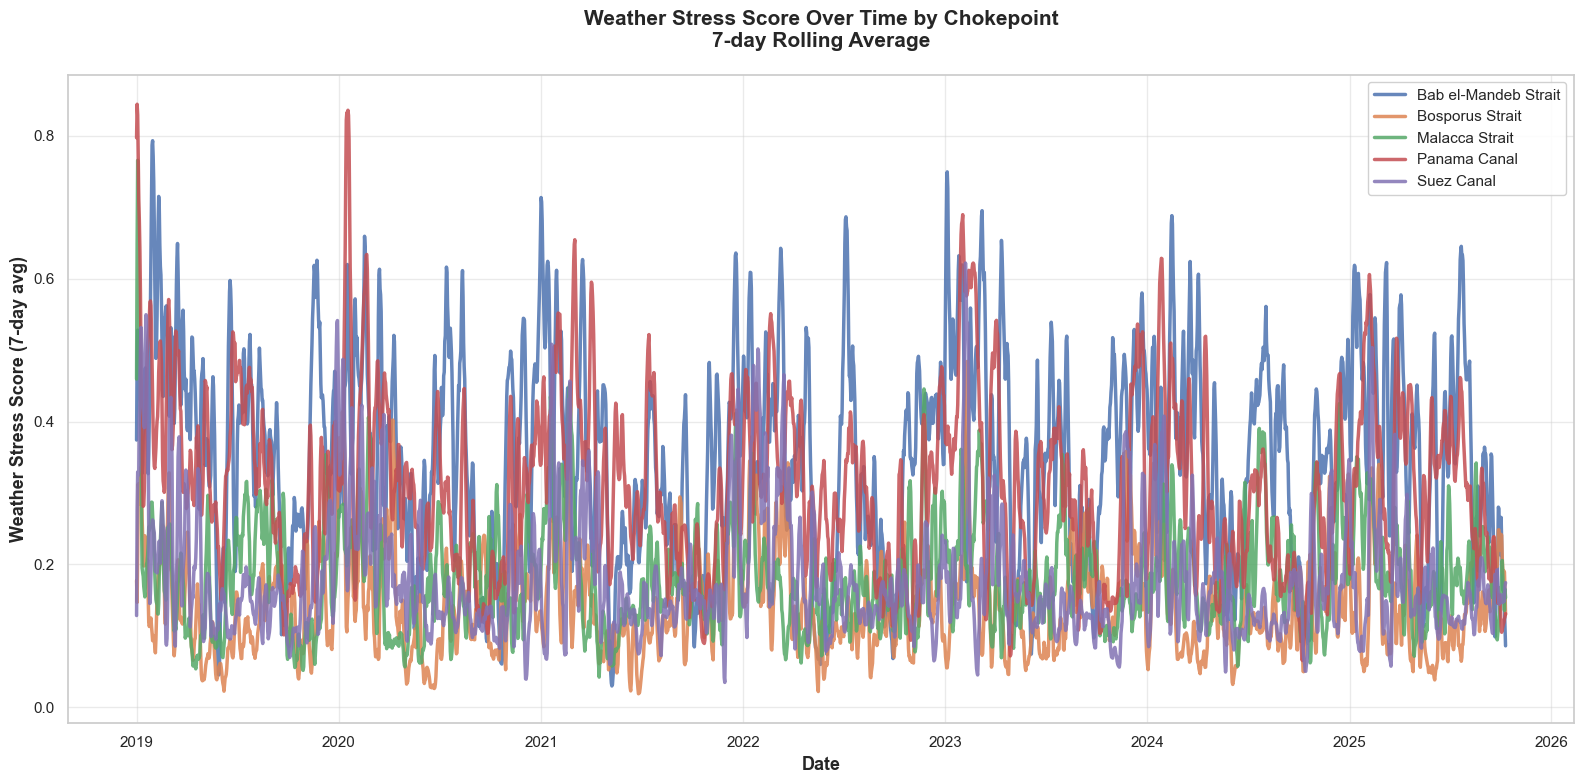

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")
plt.figure(figsize=(16, 8))

for chokepoint in final_output_df['chokepoint_name'].unique():
    cp_data = final_output_df[final_output_df['chokepoint_name'] == chokepoint].copy()
    cp_data = cp_data.sort_values('date')
    # 7-day rolling average for smoother visualization
    cp_data['rolling_stress'] = cp_data['weather_stress_score'].rolling(window=7, min_periods=1).mean()
    plt.plot(cp_data['date'], cp_data['rolling_stress'], label=chokepoint, linewidth=2.5, alpha=0.85)

plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Weather Stress Score (7-day avg)', fontsize=13, fontweight='bold')
plt.title('Weather Stress Score Over Time by Chokepoint\n7-day Rolling Average', 
          fontsize=15, fontweight='bold', pad=20)
plt.legend(loc='best', fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

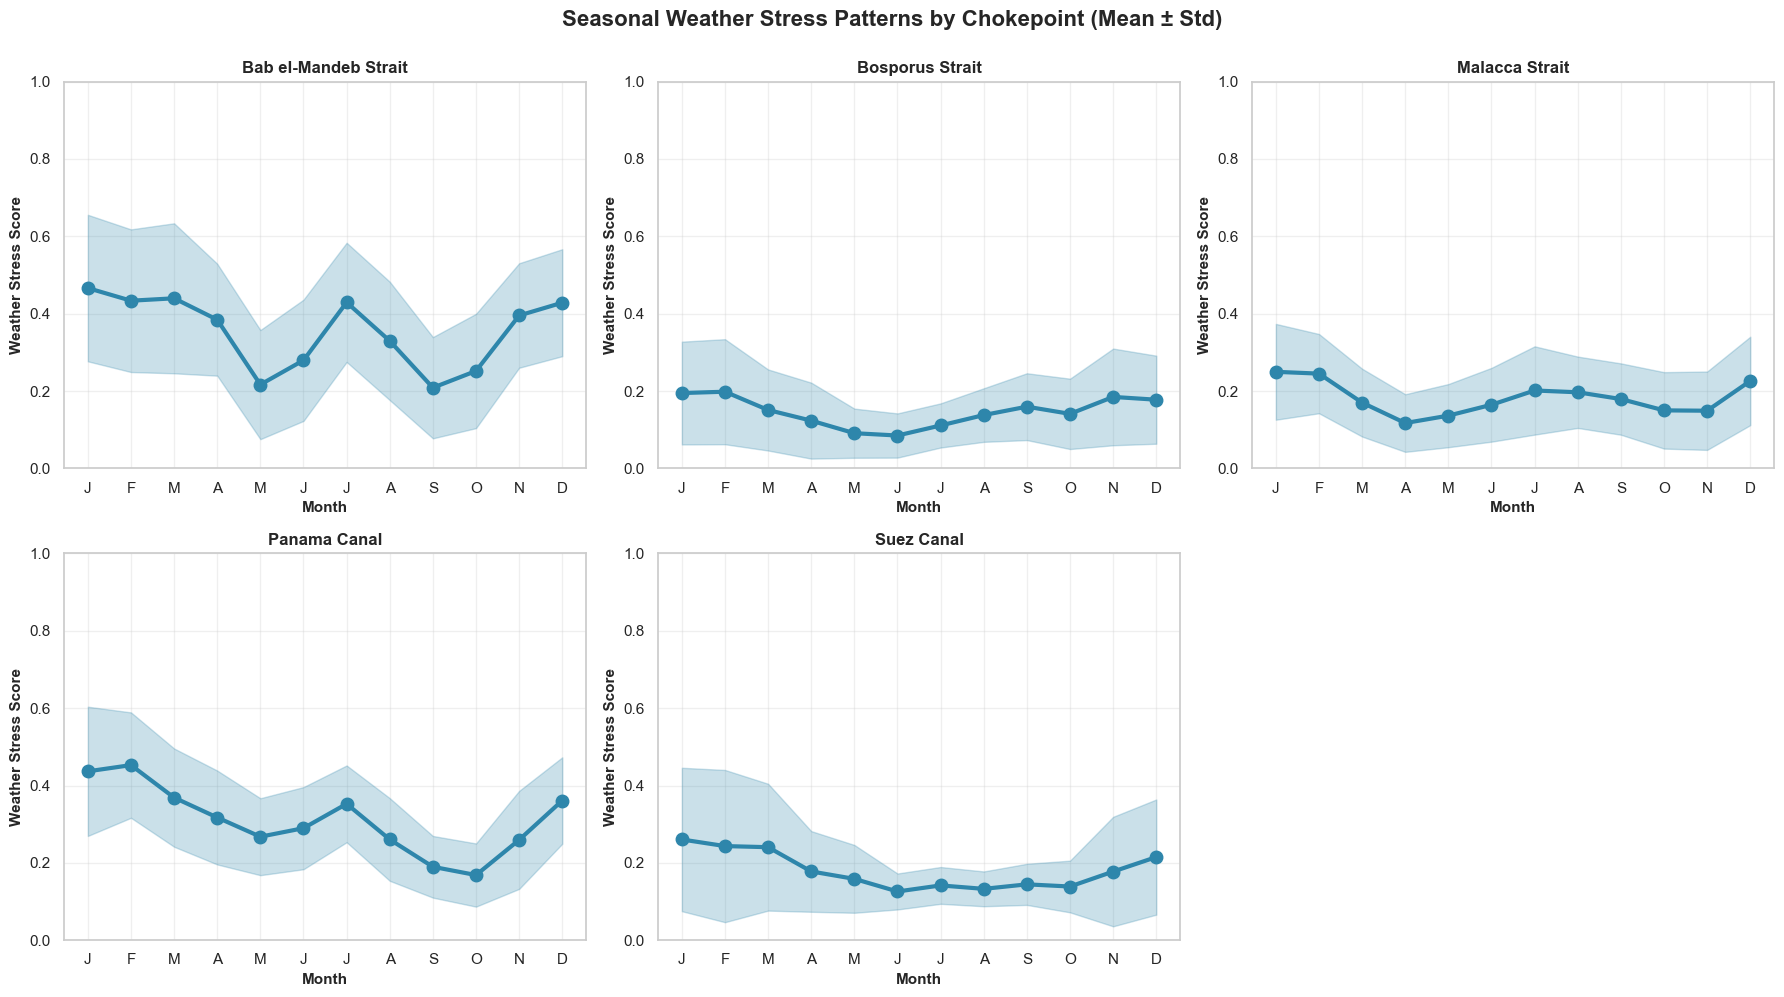

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

final_output_df['month'] = pd.to_datetime(final_output_df['date']).dt.month

for idx, chokepoint in enumerate(sorted(final_output_df['chokepoint_name'].unique())):
    cp_data = final_output_df[final_output_df['chokepoint_name'] == chokepoint]
    monthly_avg = cp_data.groupby('month')['weather_stress_score'].agg(['mean', 'std'])
    
    axes[idx].plot(monthly_avg.index, monthly_avg['mean'], 
                   marker='o', linewidth=3, markersize=9, color='#2E86AB', label='Mean')
    axes[idx].fill_between(monthly_avg.index, 
                           monthly_avg['mean'] - monthly_avg['std'],
                           monthly_avg['mean'] + monthly_avg['std'],
                           alpha=0.25, color='#2E86AB')
    axes[idx].set_xlabel('Month', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Weather Stress Score', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{chokepoint}', fontsize=12, fontweight='bold')
    axes[idx].set_xticks(range(1, 13))
    axes[idx].set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
    axes[idx].grid(True, alpha=0.3)
    axes[idx].set_ylim(0, 1)

fig.delaxes(axes[5])
plt.suptitle('Seasonal Weather Stress Patterns by Chokepoint (Mean ± Std)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

/var/folders/sw/jvm_9vs95tj9mj54z576clt40000gn/T/ipykernel_5059/1926134676.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0].boxplot(stress_data, labels=[cp.split()[0] for cp in sorted(final_output_df['chokepoint_name'].unique())],
/var/folders/sw/jvm_9vs95tj9mj54z576clt40000gn/T/ipykernel_5059/1926134676.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1].boxplot(wave_data, labels=[cp.split()[0] for cp in sorted(final_output_df['chokepoint_name'].unique())],


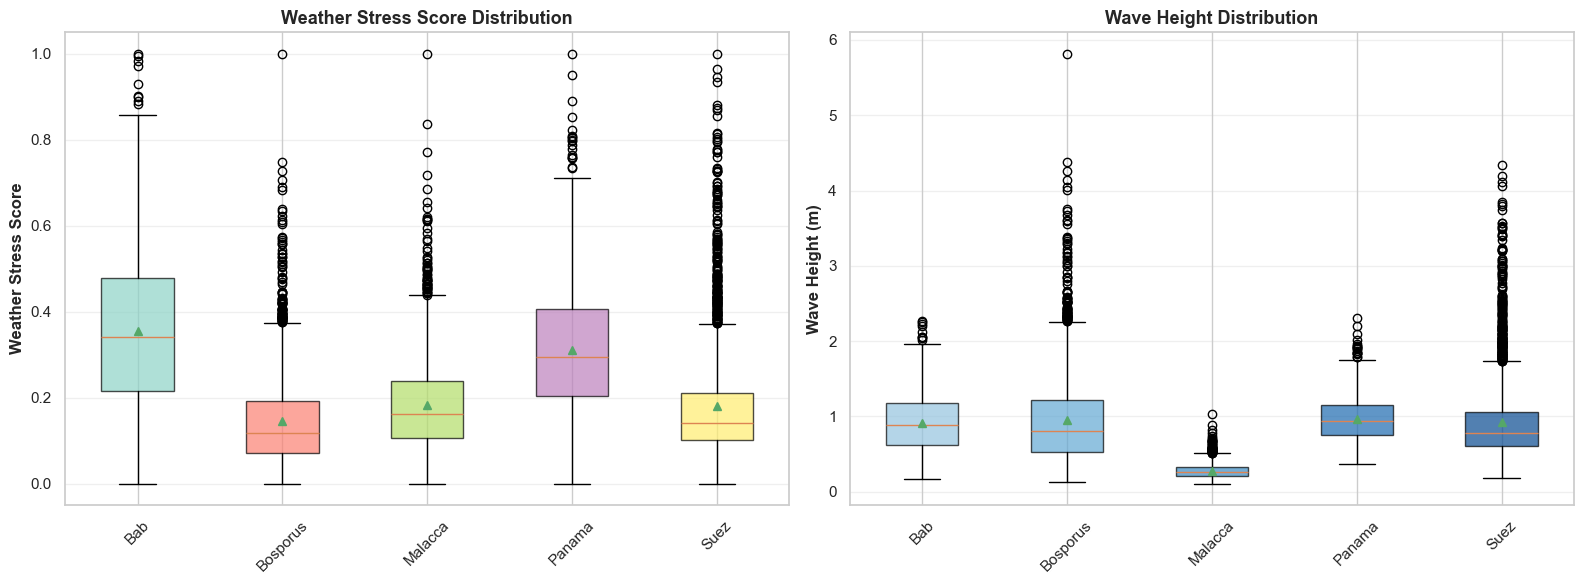

In [50]:
# Wave Height vs Weather Stress Score Comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box plot for Weather Stress Score
stress_data = [final_output_df[final_output_df['chokepoint_name'] == cp]['weather_stress_score'].dropna() 
               for cp in sorted(final_output_df['chokepoint_name'].unique())]
bp1 = axes[0].boxplot(stress_data, labels=[cp.split()[0] for cp in sorted(final_output_df['chokepoint_name'].unique())],
                       patch_artist=True, showmeans=True)
for patch, color in zip(bp1['boxes'], plt.cm.Set3(np.linspace(0, 1, len(stress_data)))):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0].set_ylabel('Weather Stress Score', fontsize=12, fontweight='bold')
axes[0].set_title('Weather Stress Score Distribution', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Box plot for Wave Height
wave_data = [final_output_df[final_output_df['chokepoint_name'] == cp]['wave_height'].dropna() 
             for cp in sorted(final_output_df['chokepoint_name'].unique())]
bp2 = axes[1].boxplot(wave_data, labels=[cp.split()[0] for cp in sorted(final_output_df['chokepoint_name'].unique())],
                       patch_artist=True, showmeans=True)
for patch, color in zip(bp2['boxes'], plt.cm.Blues(np.linspace(0.4, 0.9, len(wave_data)))):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1].set_ylabel('Wave Height (m)', fontsize=12, fontweight='bold')
axes[1].set_title('Wave Height Distribution', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

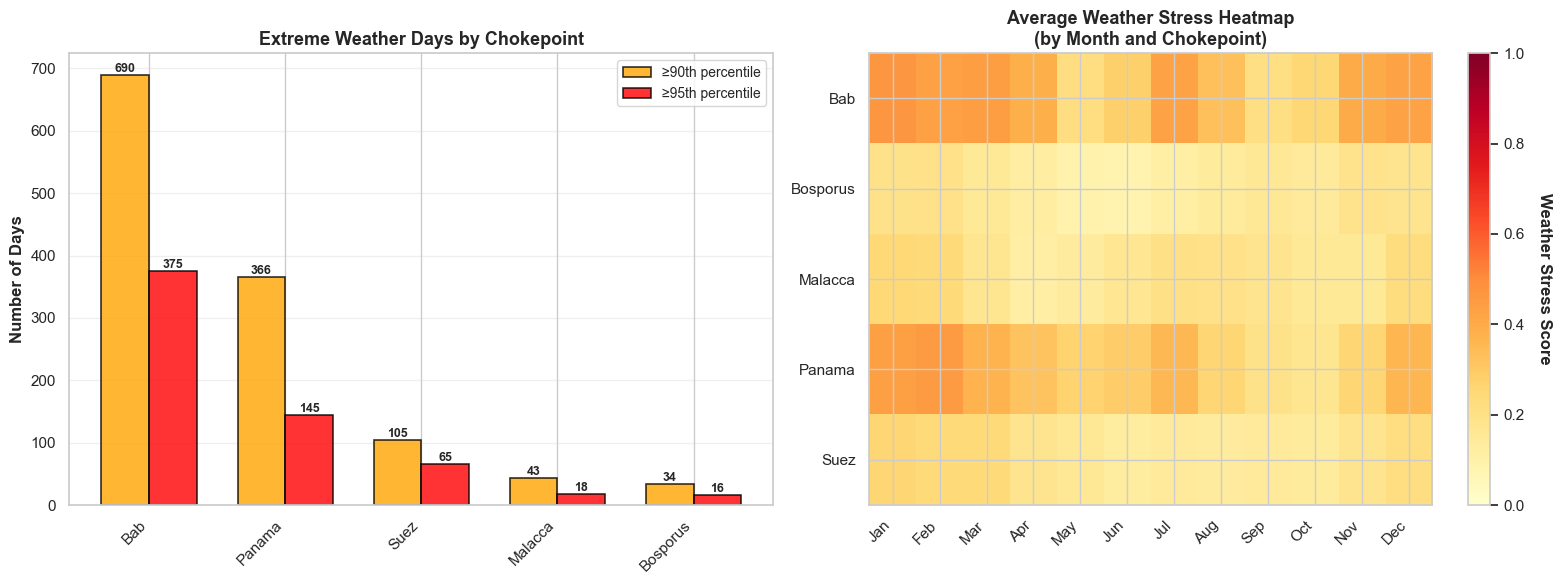

In [51]:
# Extreme Weather Events Analysis
threshold_90 = final_output_df['weather_stress_score'].quantile(0.90)
threshold_95 = final_output_df['weather_stress_score'].quantile(0.95)

extreme_90 = final_output_df[final_output_df['weather_stress_score'] >= threshold_90]
extreme_95 = final_output_df[final_output_df['weather_stress_score'] >= threshold_95]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Count of extreme events by chokepoint
counts_90 = extreme_90['chokepoint_name'].value_counts()
counts_95 = extreme_95['chokepoint_name'].value_counts()

x = np.arange(len(counts_90))
width = 0.35

bars1 = axes[0].bar(x - width/2, counts_90.values, width, label='≥90th percentile', 
                    color='orange', edgecolor='black', linewidth=1.2, alpha=0.8)
bars2 = axes[0].bar(x + width/2, counts_95.values, width, label='≥95th percentile', 
                    color='red', edgecolor='black', linewidth=1.2, alpha=0.8)

axes[0].set_xticks(x)
axes[0].set_xticklabels([cp.split()[0] for cp in counts_90.index], rotation=45, ha='right')
axes[0].set_ylabel('Number of Days', fontsize=12, fontweight='bold')
axes[0].set_title('Extreme Weather Days by Chokepoint', fontsize=13, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Heatmap of average stress by month and chokepoint
final_output_df['month'] = pd.to_datetime(final_output_df['date']).dt.month
pivot_table = final_output_df.pivot_table(
    values='weather_stress_score', 
    index='chokepoint_name', 
    columns='month', 
    aggfunc='mean'
)

im = axes[1].imshow(pivot_table.values, cmap='YlOrRd', aspect='auto', vmin=0, vmax=1)
axes[1].set_xticks(range(12))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45, ha='right')
axes[1].set_yticks(range(len(pivot_table.index)))
axes[1].set_yticklabels([cp.split()[0] for cp in pivot_table.index])
axes[1].set_title('Average Weather Stress Heatmap\n(by Month and Chokepoint)', 
                  fontsize=13, fontweight='bold')
cbar = plt.colorbar(im, ax=axes[1])
cbar.set_label('Weather Stress Score', rotation=270, labelpad=20, fontweight='bold')

plt.tight_layout()
plt.show()